In [712]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, ShuffleSplit
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector, mutual_info_classif, chi2, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.cluster import SpectralClustering
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
import lightgbm as lgb
from scipy.stats import f_oneway
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.linear_model import LassoCV, Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Data Source

- The data set, which was initially created by IBM data scientists in 2017, is from the Kaggle platform (link). As Human Resources data is highly confidential, the data provided here is fictional but structured similarly to real data. It has 1470 rows and 35 columns, and each row indicates each employee data. This data set has no missing values. As for the response variable, Attrition, it consists of 237 of ‘Yes’ values and 1233 of ‘No’ values. The following table explains each variable with short description and type. 
- Dataset link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## Variable Description

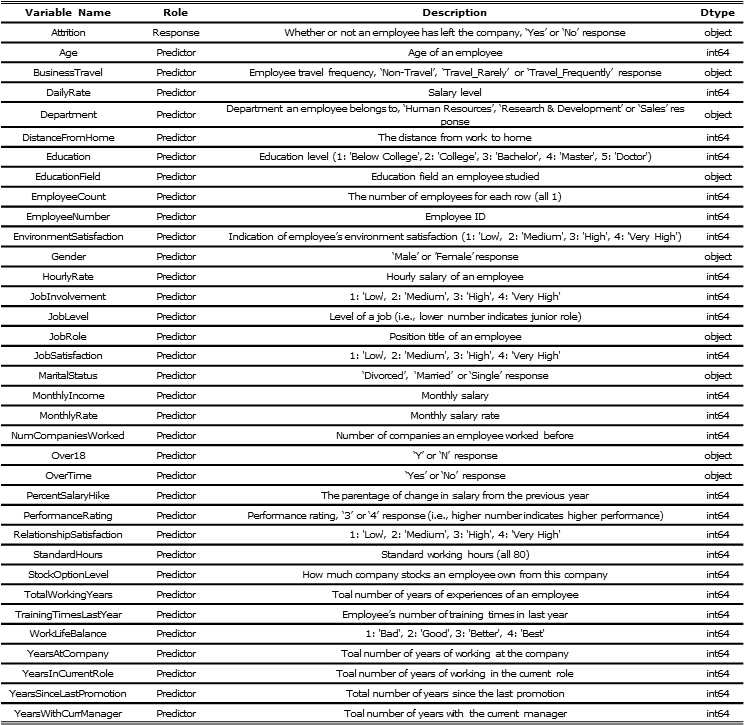

In [713]:
Image('var_description.png')

## 1. Basic Information of Data

In [714]:
# load the data
os.getcwd()
data = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# missing data check
data = data.copy()

print(f'# of missing data : {(data.isna().any(axis=1)).sum()}')

# white space check
check_spaces = data.apply(lambda x: x.map(lambda x: str(x).isspace()))
print(f'# of white space data : {check_spaces.any(axis=1).sum()}')

# of missing data : 0
# of white space data : 0


In [715]:
# check the basic info of data
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [716]:
# check the first 5 rows of data
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## 2. Exploratory Data Analysis (EDA)

### 2.1. Attrition based on Our Interest

In [717]:
# total # of Attrition
print(data["Attrition"].value_counts(), "\n") # No     1233, Yes     237

# attrition based on Department, PerformanceRating, Generation
category_check_data = data.copy()
category_check_data["Generation"] = category_check_data.apply(lambda x : "GenZ&M" if x["Age"] <= 36 else ("GenX" if (x["Age"] > 36 and x["Age"] <= 52) else "Boomers"), axis=1)
category = ["Department", "PerformanceRating", "Generation"]

for i in category :
    total_ppl = category_check_data.groupby(i).size()
    attr_y = category_check_data.groupby(i).apply(lambda group : group[group["Attrition"]=="Yes"].count())["Attrition"]
    new_hires = category_check_data.groupby(i).apply(lambda group : group[group["YearsAtCompany"]==0].count())["YearsAtCompany"]
    start_ppl = total_ppl - new_hires
    end_ppl = start_ppl - attr_y + new_hires
    attr_rate = attr_y/((start_ppl + end_ppl)/2)
    print(attr_rate)
    print()

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

Department
Human Resources           0.210526
Research & Development    0.150965
Sales                     0.234994
dtype: float64

PerformanceRating
3    0.177699
4    0.181373
dtype: float64

Generation
Boomers    0.131313
GenX       0.109434
GenZ&M     0.236974
dtype: float64



### 2. 2. PCA, ISOMAP plots of Data

Cumulative explained variance of 2 PCs (Department) : 0.23912110022163993
Cumulative explained variance of 2 PCs (PerformanceRating) : 0.24327732132541713
Cumulative explained variance of 2 PCs (Generation) : 0.23403098952962959


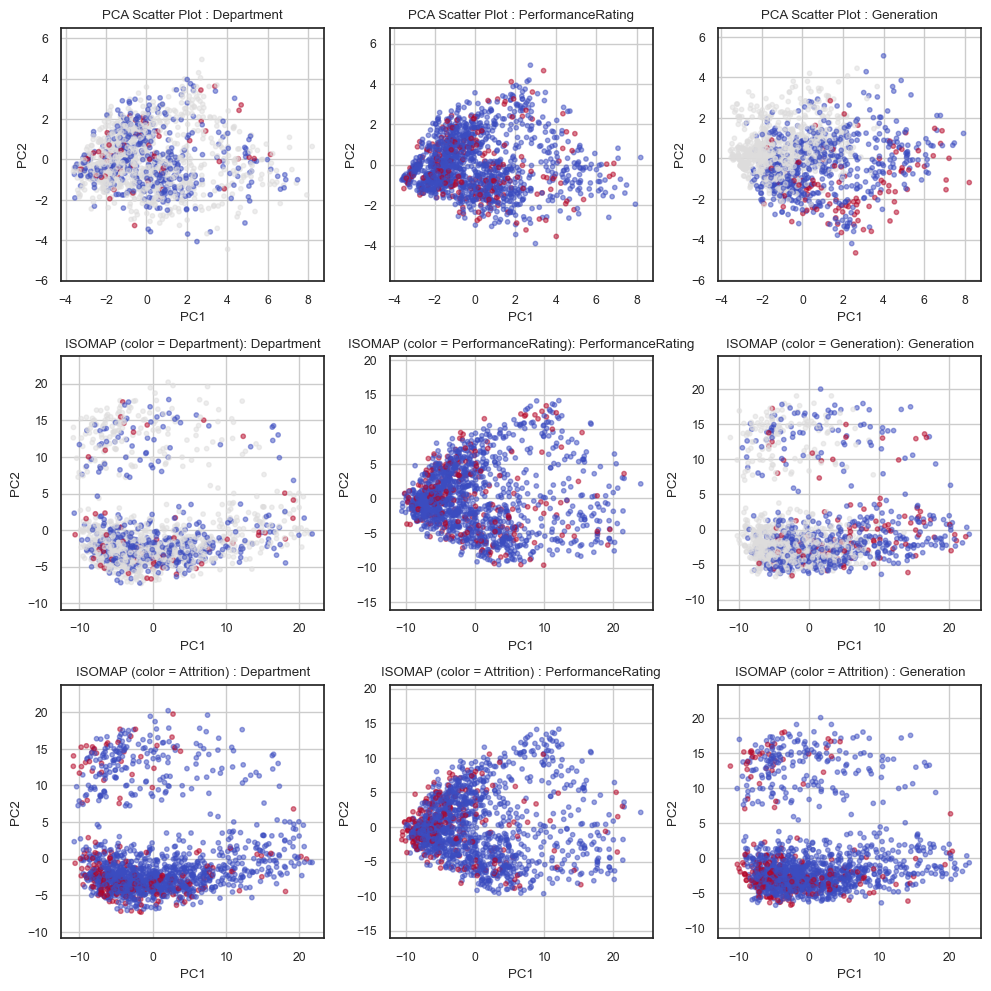

In [718]:
# PCA

# Notice that it is just to roughly check how the data is structured. Therefore potential outliers were not removed.
# Considering low explained variance ratio, it could be not fully representing the data.

# Attrition variable transformation
category_check_data["Attrition"] = category_check_data["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)

fig, ax = plt.subplots(3, 3, figsize = (10, 10))

for i in range(len(category)) :
    row = i // 3
    col = i % 3
    
    # assign numbers to unique values in each category (ex. Sales = 1, Research & Development = 2, HR = 3)
    unique_cate = category_check_data[category[i]].unique()
    category_mapping = {cate: j+1 for j, cate in enumerate(unique_cate)}
    category_check = category_check_data[category[i]].replace(category_mapping) 
    
    # create dummy variables from predictors
    data_pca_check = pd.get_dummies(category_check_data.drop(columns = category[i]).drop(columns=["Attrition"])) 
    data_numeric_col = data_pca_check.select_dtypes(include=['int64', 'float64']).columns
    
    # scaling numerical variables
    data_pca_check[data_numeric_col] = StandardScaler().fit(data_pca_check[data_numeric_col]).transform(data_pca_check[data_numeric_col]) 

    # PCA 
    pca = PCA(n_components =2).fit(data_pca_check)
    pc = pca.transform(data_pca_check)
    print(f'Cumulative explained variance of 2 PCs ({category[i]}) : {sum(pca.explained_variance_ratio_)}') 
    # plot
    ax[row, col].scatter(pc[:,0], pc[:,1], s=10, c=category_check, alpha=0.5, cmap="coolwarm")
    ax[row, col].set_title(f'PCA Scatter Plot : {category[i]}')
    ax[row, col].set_xlabel('PC1')  
    ax[row, col].set_ylabel('PC2')
    ax[row, col].axis('equal')
    ax[row, col].grid()

    # ISOMAP 
    isomap = Isomap(n_components=2, n_neighbors=5)
    X_reduced = isomap.fit_transform(data_pca_check)
    # plot (colors = category)
    ax[row+1, col].scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=category_check, alpha=0.5, cmap="coolwarm")
    ax[row+1, col].set_title(f'ISOMAP (color = {category[i]}): {category[i]}')
    ax[row+1, col].set_xlabel('PC1')  
    ax[row+1, col].set_ylabel('PC2')
    ax[row+1, col].axis('equal')
    ax[row+1, col].grid()
    # plot (colors = attrition)
    ax[row+2, col].scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=category_check_data["Attrition"], alpha=0.5, cmap="coolwarm")
    ax[row+2, col].set_title(f'ISOMAP (color = Attrition) : {category[i]}')
    ax[row+2, col].set_xlabel('PC1')  
    ax[row+2, col].set_ylabel('PC2')
    ax[row+2, col].axis('equal')
    ax[row+2, col].grid()
    
plt.tight_layout() 
plt.show()

C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


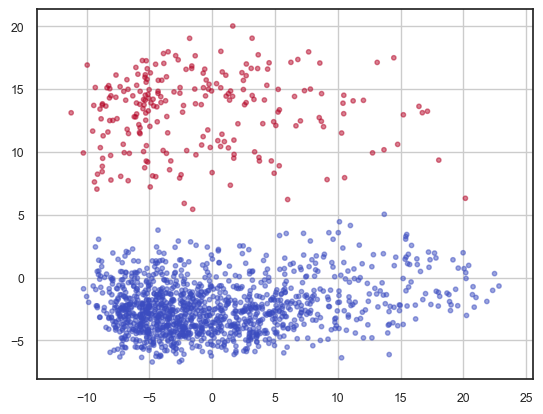

In [507]:
# ISOMAP with spectral clustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', n_neighbors=5, random_state=42)
y_pred = spectral_clustering.fit_predict(X_reduced[:,:2])

plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=y_pred, alpha=0.5, cmap="coolwarm")
plt.axis('equal')
plt.grid()
plt.show()

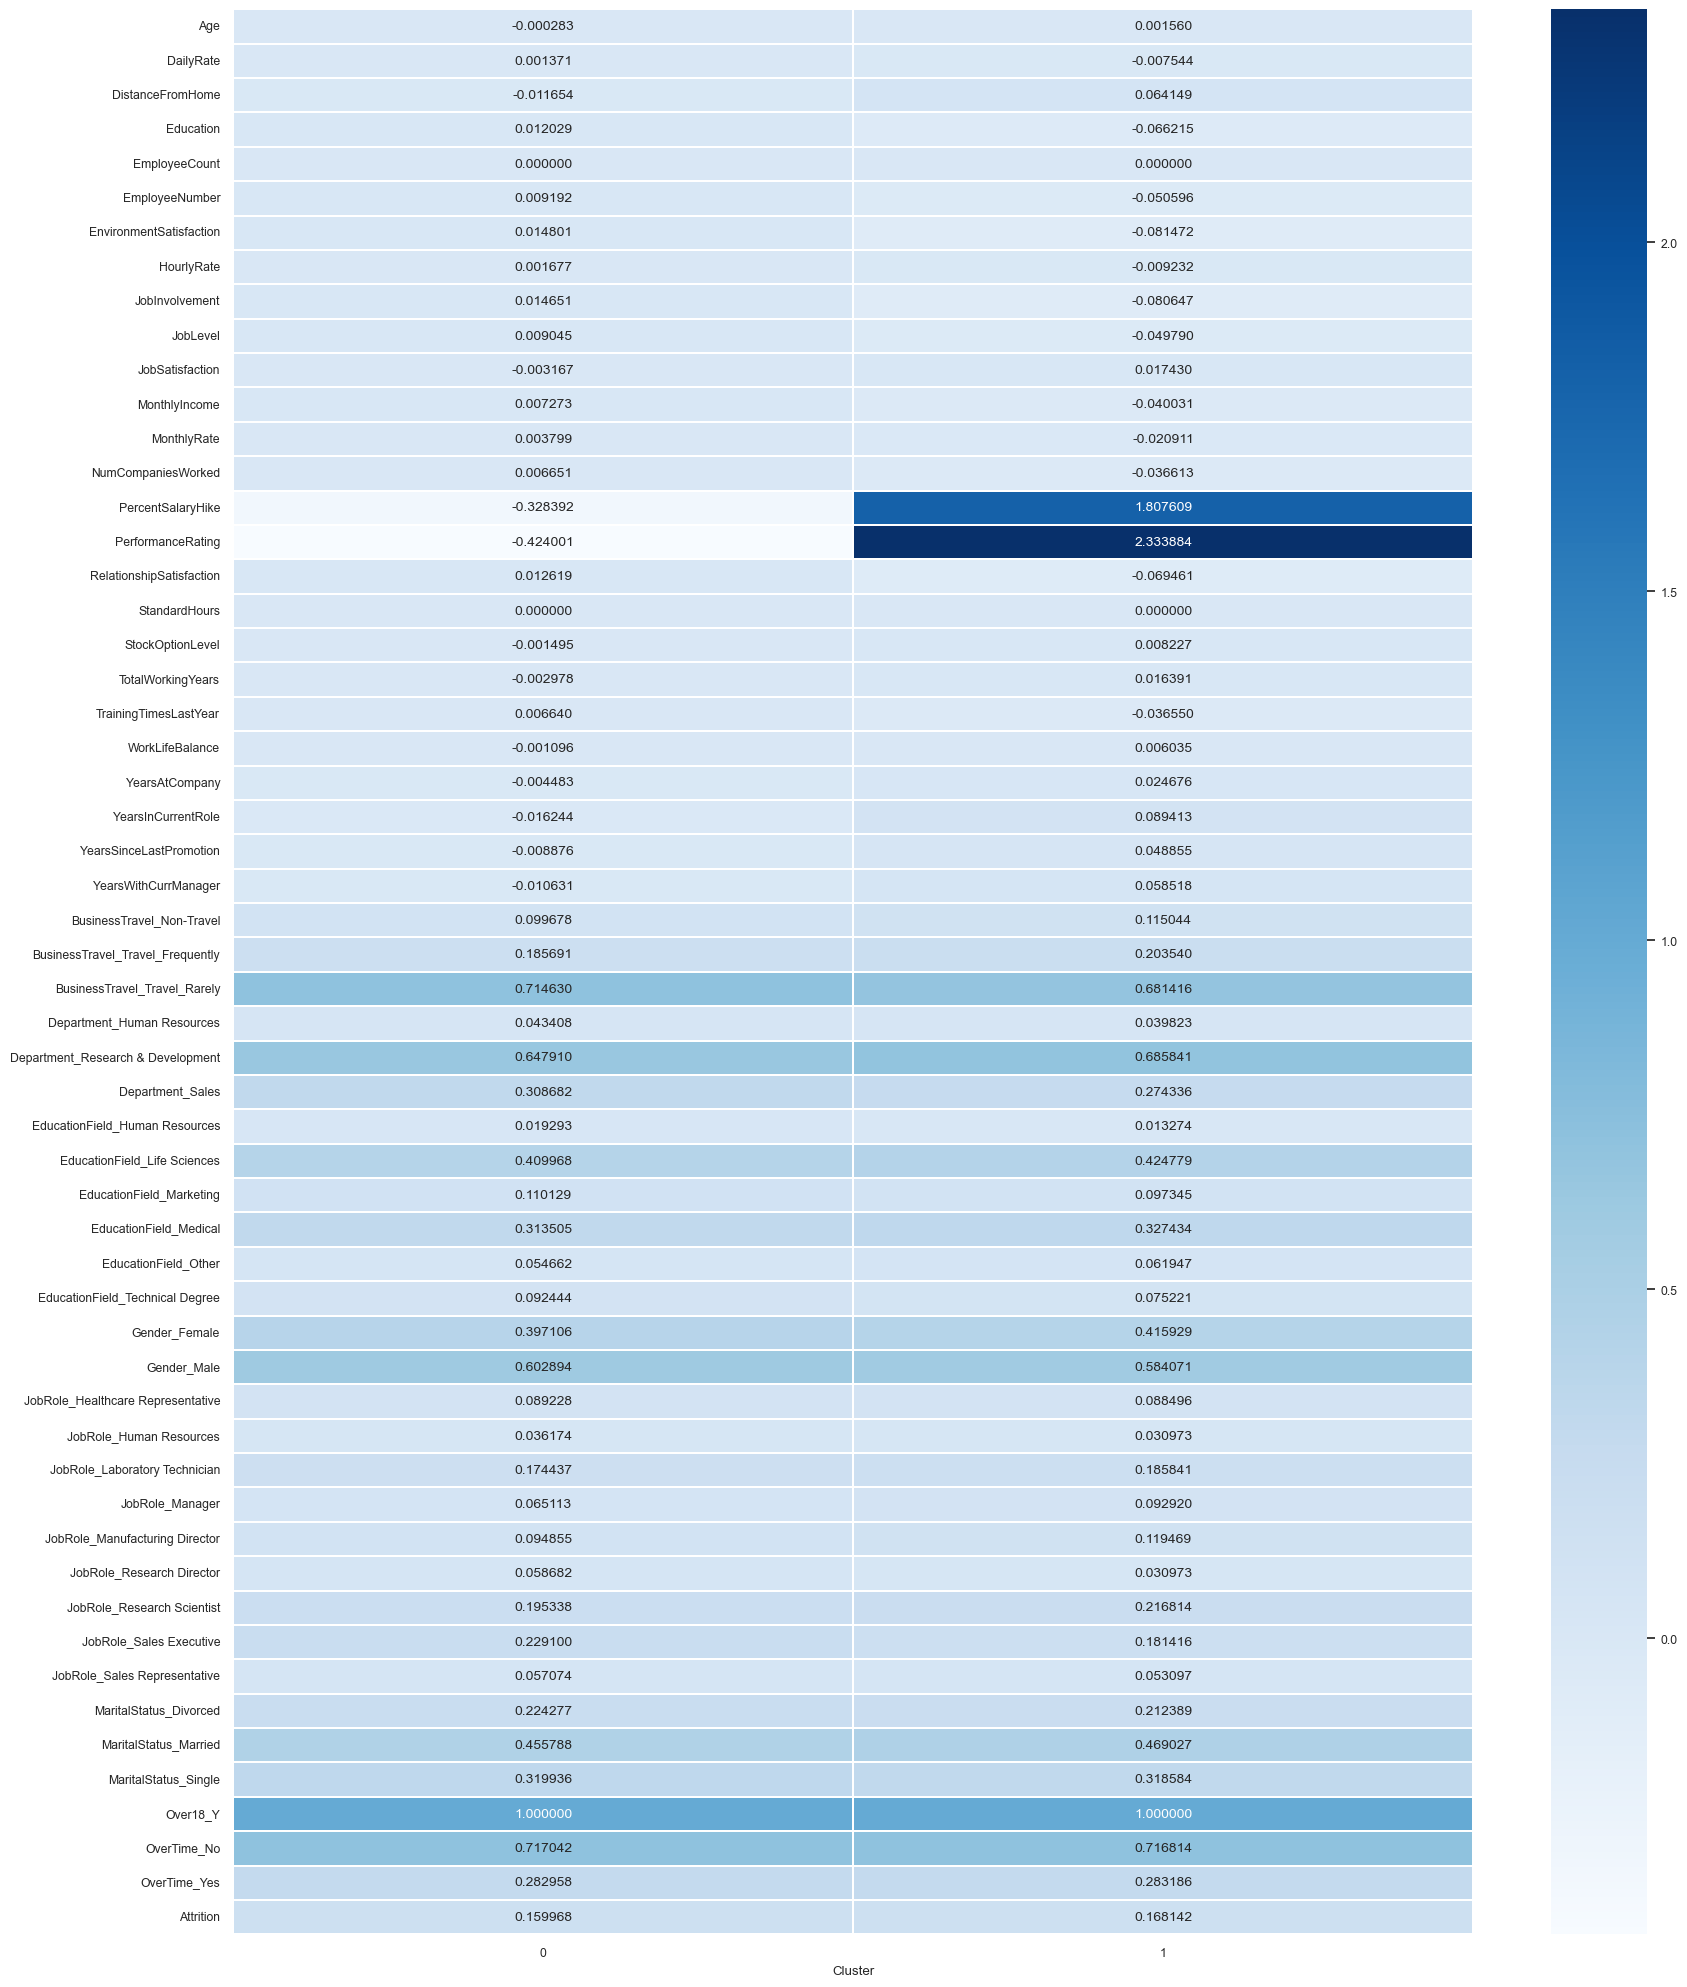

In [370]:
# checking the cluster
# interesting result is that data can be non linearly separable using PerformanceRating or PercentSalaryHike
# although Attrition does not seem to seperate the data well, these variables do 
# this is not related to our goal of this analysis, but this implies we could construct models that can predict PerformanceRating

data_pca_check["Cluster"] = y_pred
data_pca_check["Attrition"]= category_check_data["Attrition"]

data_pca_check[data_pca_check["Cluster"]==1].mean()
cluster_mean = data_pca_check.groupby(["Cluster"]).mean().T
plt.figure(figsize=(20, 25))
sns.heatmap(cluster_mean, annot = True, fmt='1f', linewidth = 0.1, annot_kws = {'fontsize':10}, cmap="Blues")
plt.show()

### 2. 3. ANOVA Test

In [719]:
# ANOVA based on groups of our interest
for i in range(len(category)) :
    unique_cate = category_check_data[category[i]].unique()
    unique_cate_data = []
    for j in unique_cate :
        unique_cate_data.append(category_check_data[category_check_data[category[i]] == j]['Attrition'].tolist())
    f_statistic, p_value = f_oneway(*unique_cate_data)
    print(f"F-statistic {category[i]}: ", f_statistic)
    print(f"p-value {category[i]}:", p_value, "\n")

# The result indicates that gruops with different PerformanceRating seem to show no difference in their means.

F-statistic Department:  5.426843272582724
p-value Department: 0.004485674813058454 

F-statistic PerformanceRating:  0.01225039553422336
p-value PerformanceRating: 0.9118840421067758 

F-statistic Generation:  14.520649244449514
p-value Generation: 5.693387735335216e-07 



### 2. 4. Preprocess of Data

In [720]:
# Attiriton variable transformation
data["Attrition"] = data["Attrition"].apply(lambda x : 1 if x == "Yes" else 0) 

# Check the EmployeeNumber duplication
print(f'# of duplicated Employee Number in the data : {sum(data["EmployeeNumber"].duplicated())}') # 0

# Remove duplicated or similar metrics variables
data = data.drop(columns = ["EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate",  
                            "MaritalStatus", "Over18", "StandardHours"])
# EmployeeCount : It's all 1
# EmployeeNumber : Just an indicator of each employee
# DailyRate, HourlyRate, MonthlyRate : For the simplicity of the problem, drop income measures beside MonthlyIncome
# JobRole : Similar to JobLevel. Both indicates hierarchy level of job (revoked)
# MaritalStatus : Solution cannot be made regardless of the power of this variable
# Over18, StandardHours : All data points have the same values in these variables 

# check the number of the variables in new data
print(f'The number of the variables in after the data preprocess : {len(data.columns)}')

# of duplicated Employee Number in the data : 0
The number of the variables in after the data preprocess : 27


## 3. Data Analysis (Department)

## 3.1. Sales Department Analysis

### 3.1.1. Exploratory Data Analysis (Sales)

### 3.1.1.1. Distritbution

# of Attrition in Sales Department : 92
# of Non-Attrition in Sales Department : 354


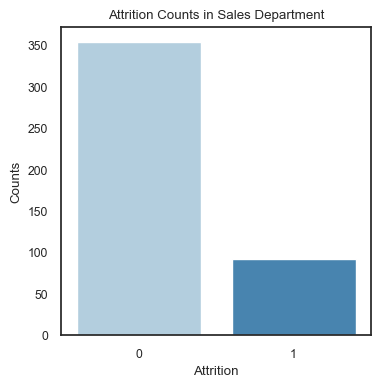

In [721]:
# Department set up 
data_HR = data.loc[data["Department"]=="Human Resources",]
data_RnD = data.loc[data["Department"]=="Research & Development",]
data_Sales = data.loc[data["Department"]=="Sales",]

X_HR = data_HR.drop(columns = ["Attrition", "Department"])
X_RnD = data_RnD.drop(columns = ["Attrition", "Department"])
X_Sales = data_Sales.drop(columns = ["Attrition", "Department"])

y_HR = data_HR["Attrition"]
y_RnD = data_RnD["Attrition"]
y_Sales = data_Sales["Attrition"]

data_Sales = data_Sales.drop(columns=["Department"])

# Attrition count plot
Sales_attriton = y_Sales.value_counts()
print(f'# of Attrition in Sales Department : {Sales_attriton[1]}')
print(f'# of Non-Attrition in Sales Department : {Sales_attriton[0]}')
plt.figure(figsize=(4, 4))
sns.countplot(data=data_Sales, x="Attrition", palette="Blues")
plt.title("Attrition Counts in Sales Department")
plt.xlabel("Attrition")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

# The data is imbalanced.

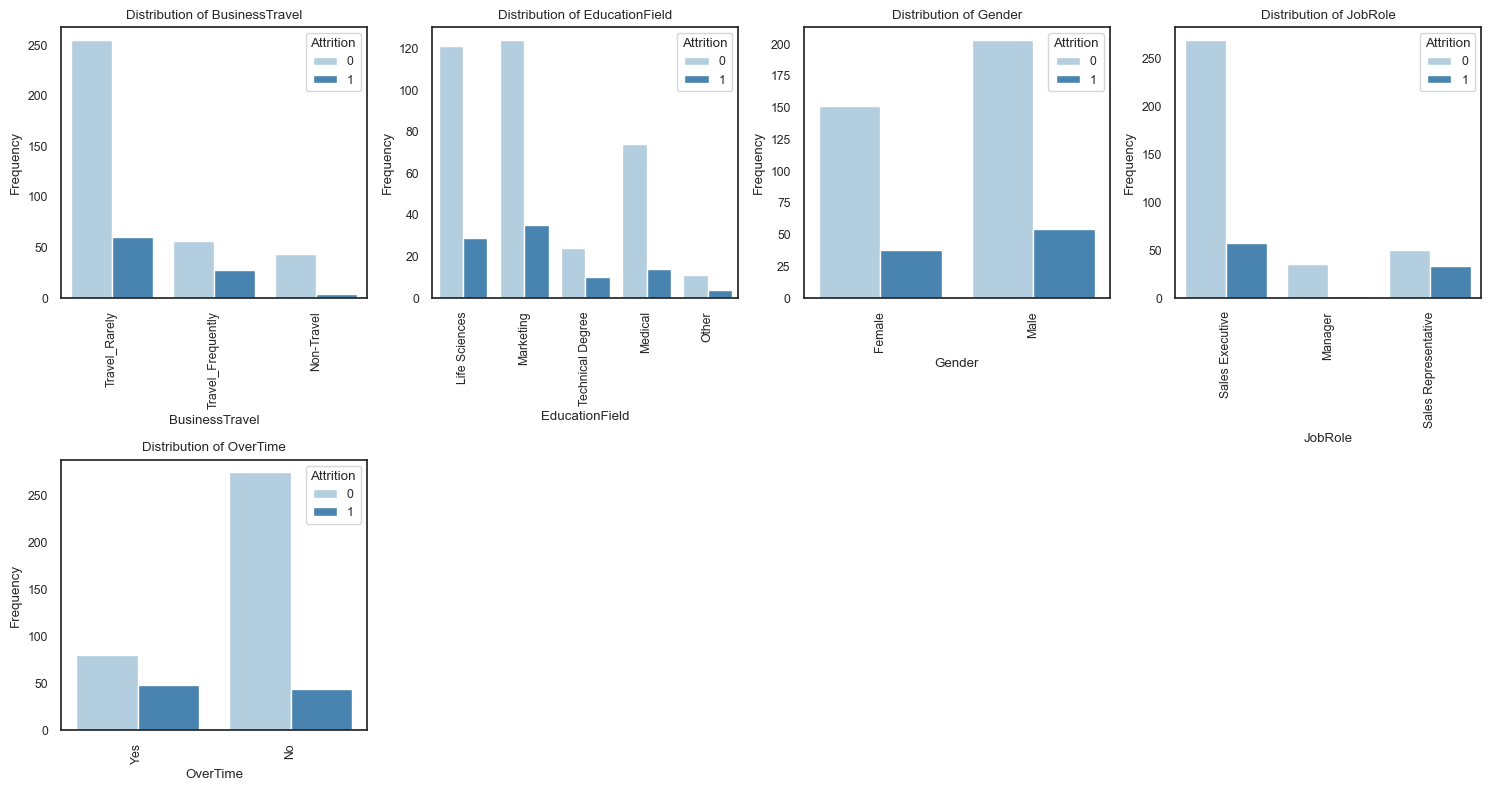

In [722]:
# Categorical variables count plot

# set up the categorical columns
cate_cols = X_Sales.select_dtypes(include=['object']).columns

# counter plot for categorical variables
sns.set(font_scale=0.8)
sns.set_style("white")

# num_features = len(cate_cols) # 4

# calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(cate_cols) / 4)) 

plt.figure(figsize=(15, n_rows * 4))  # Dynamic figure size

for i, col in enumerate(cate_cols, 1): 
    plt.subplot(n_rows, 4, i)  
    sns.countplot(x=cate_cols[i-1], data=X_Sales, palette='Blues', hue=y_Sales) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.tick_params(axis='x', rotation=90)

plt.tight_layout() 
plt.show()

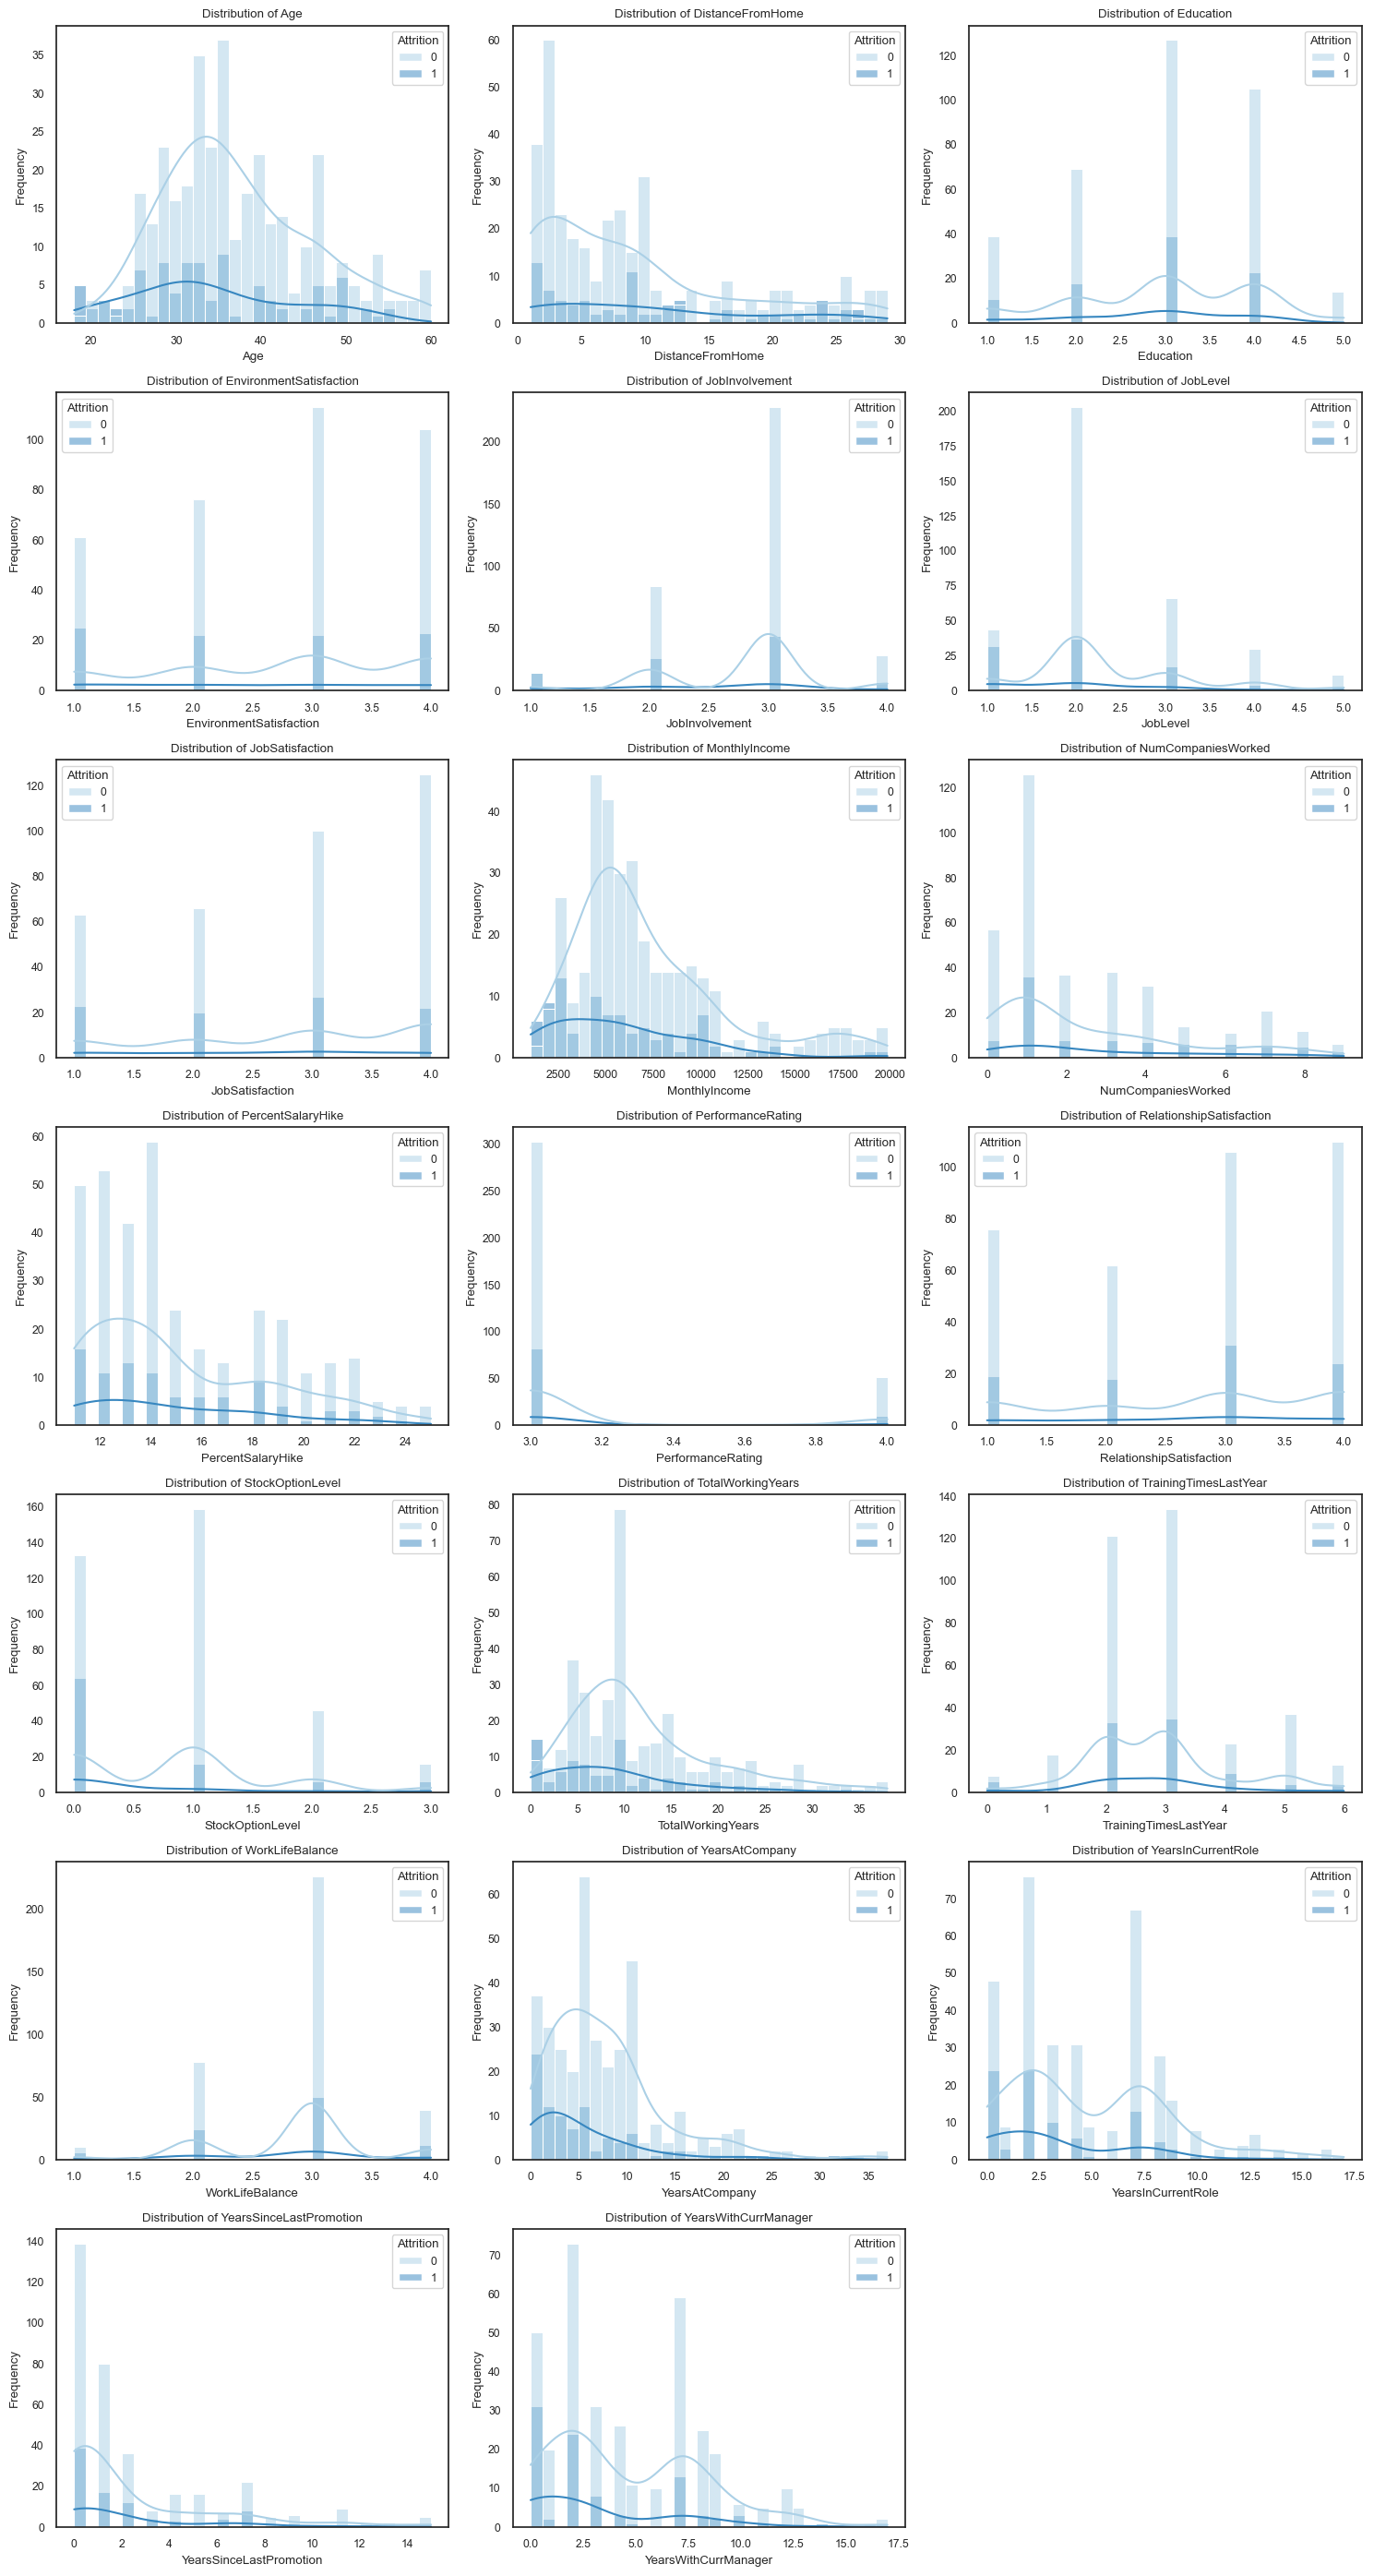

In [724]:
# Numerical variables distribution

# set up the numerical columns
numeric_cols = X_Sales.select_dtypes(include=['int64', 'float64']).columns

# calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(numeric_cols) / 3))  

plt.figure(figsize=(15, n_rows * 4)) 

for i, col in enumerate(numeric_cols, 1): 
    plt.subplot(n_rows, 3, i)  
    sns.histplot(data=X_Sales, x=col, bins=30, palette='Blues', hue=y_Sales, kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [725]:
# First year seems to be very important factor in Attrition

In [726]:
print(data_Sales["JobInvolvement"].value_counts(), "\n")
print(data_Sales["JobLevel"].value_counts(), "\n")
print(data_Sales["NumCompaniesWorked"].value_counts(), "\n")
print(data_Sales["StockOptionLevel"].value_counts(), "\n")
print(data_Sales["TrainingTimesLastYear"].value_counts(), "\n")
print(data_Sales["WorkLifeBalance"].value_counts())

JobInvolvement
3    272
2    110
4     35
1     29
Name: count, dtype: int64 

JobLevel
2    240
3     83
1     76
4     34
5     13
Name: count, dtype: int64 

NumCompaniesWorked
1    162
0     65
3     46
2     45
4     39
7     26
5     20
8     17
6     17
9      9
Name: count, dtype: int64 

StockOptionLevel
0    197
1    175
2     52
3     22
Name: count, dtype: int64 

TrainingTimesLastYear
3    169
2    154
5     41
4     32
1     20
6     17
0     13
Name: count, dtype: int64 

WorkLifeBalance
3    276
2    102
4     52
1     16
Name: count, dtype: int64


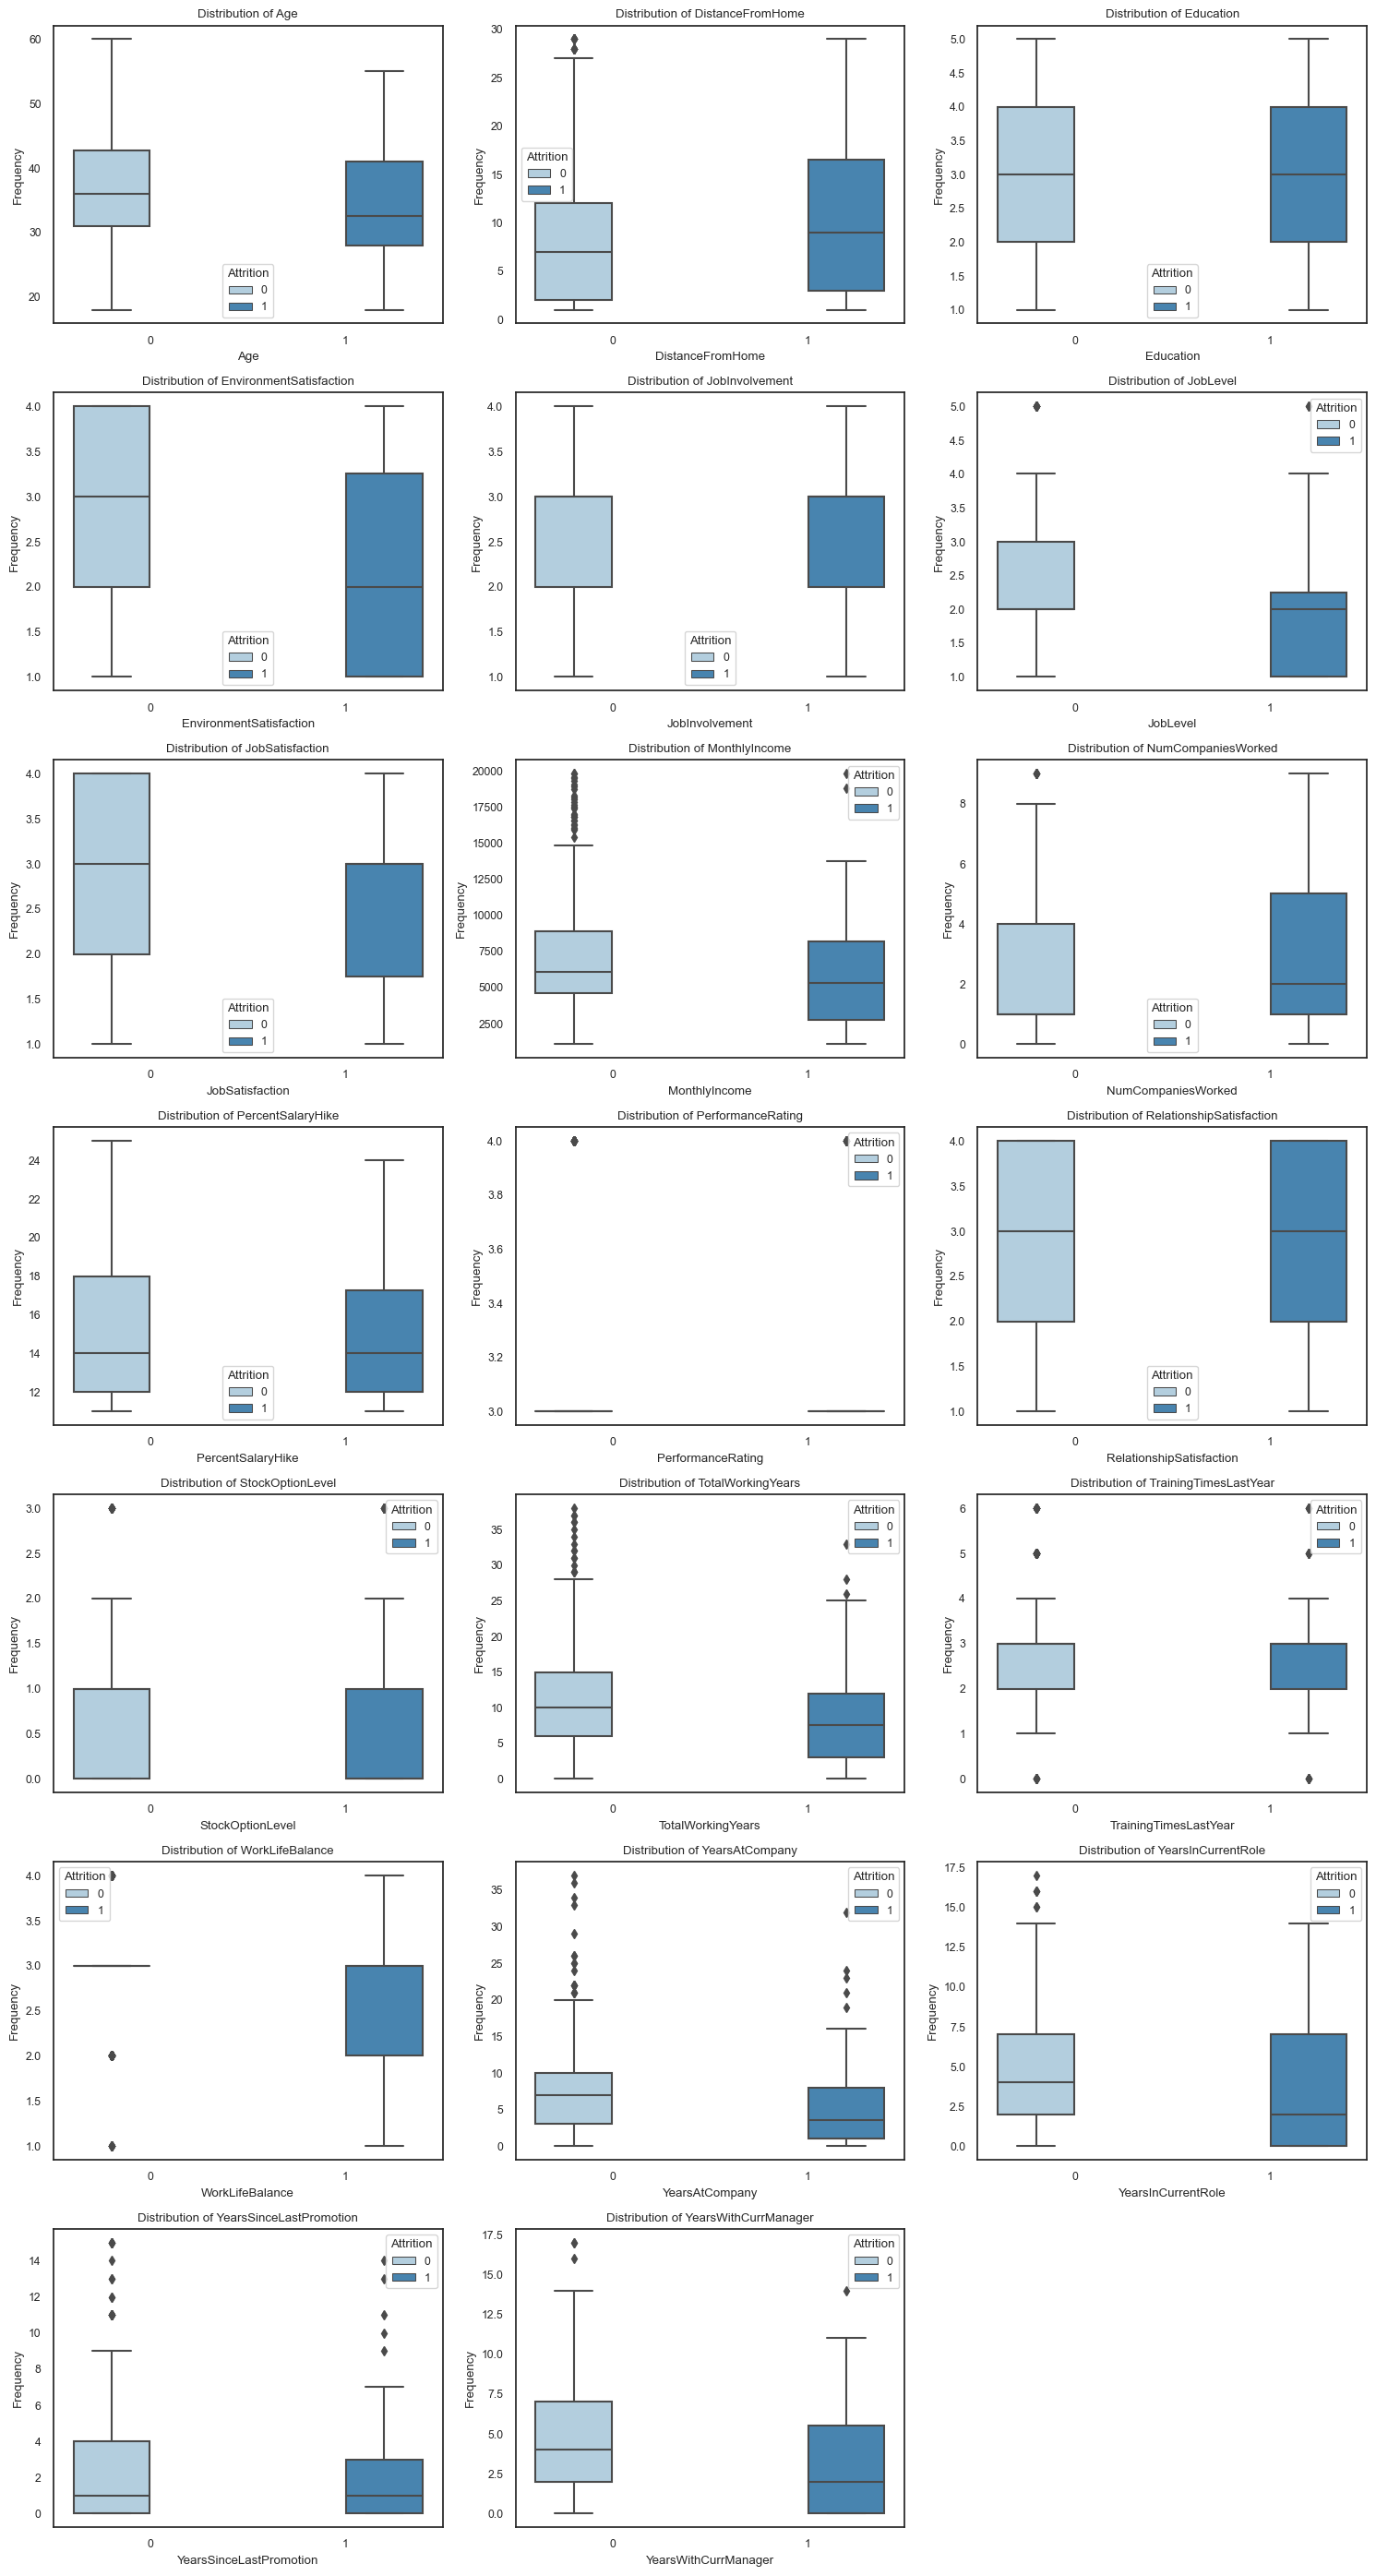

In [728]:
# Numerical variables distribution

# set up the numerical columns
numeric_cols = X_Sales.select_dtypes(include=['int64', 'float64']).columns

# calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(numeric_cols) / 3))  

plt.figure(figsize=(15, n_rows * 4)) 

for i, col in enumerate(numeric_cols, 1): 
    plt.subplot(n_rows, 3, i)  
#     sns.histplot(data=X_Sales, x=col, bins=30, palette='Blues', hue=y_Sales, kde=True) 
    sns.boxplot(x = "Attrition", y = col, data=data_Sales, palette='Blues', hue=y_Sales)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

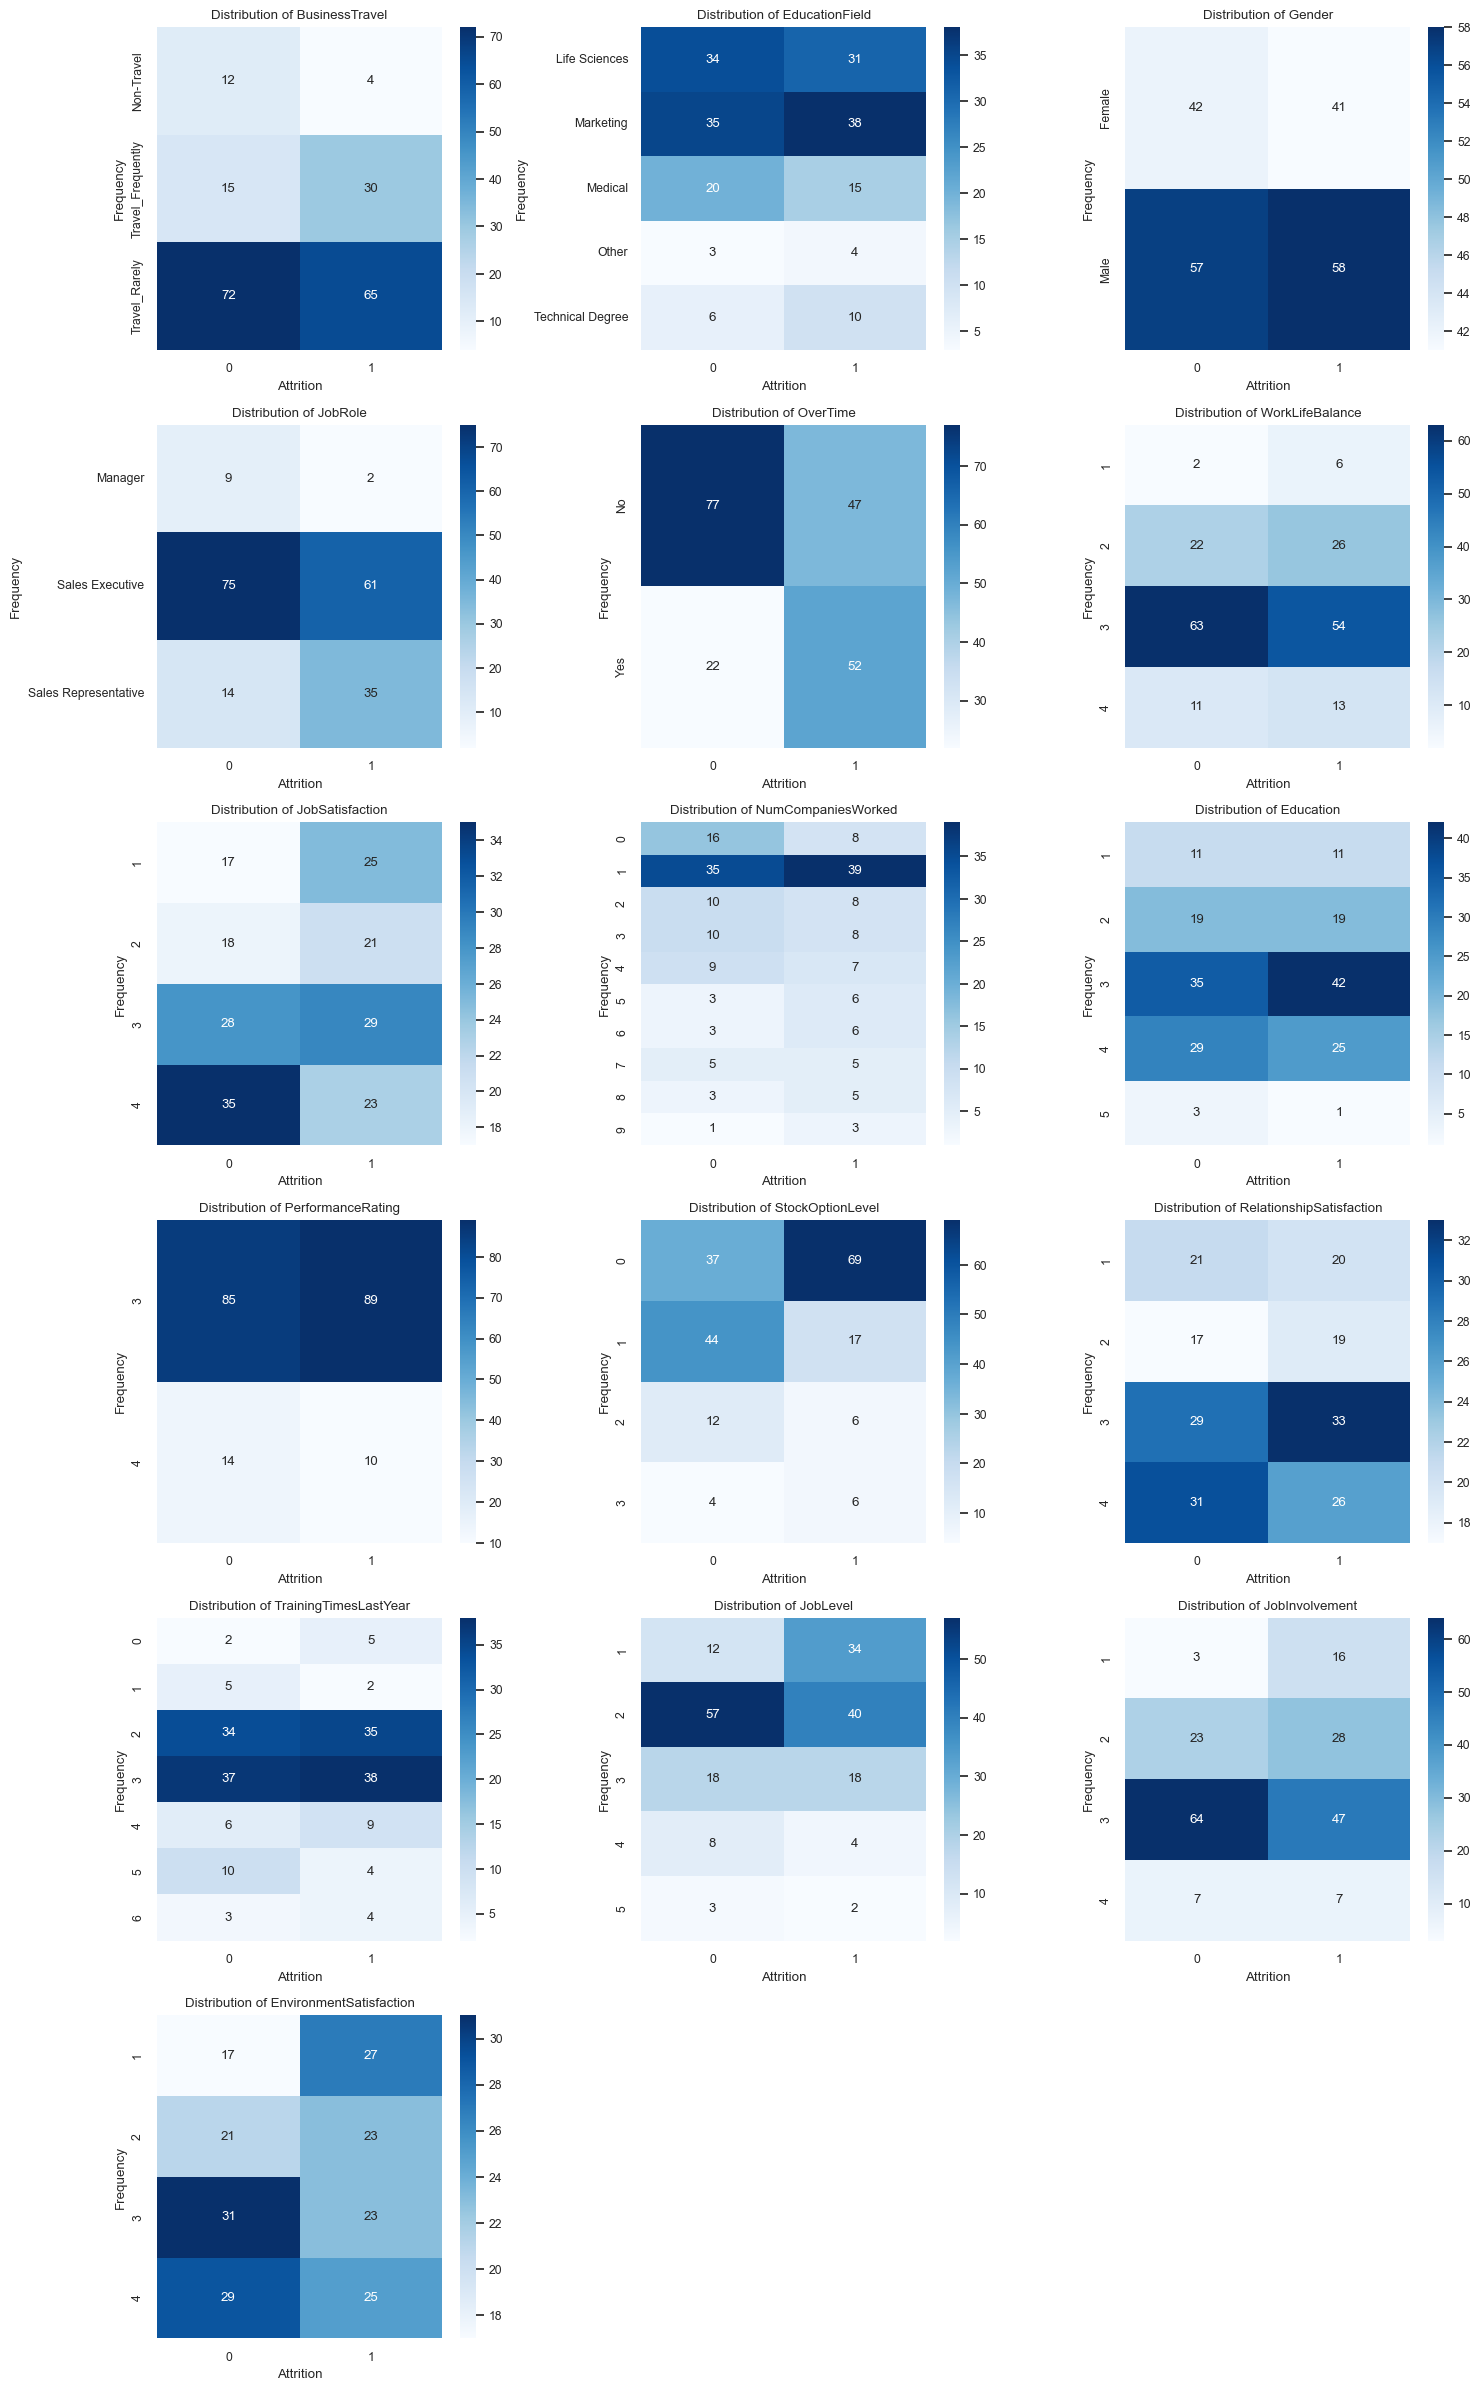

In [729]:
# Heatmap check for categorical col + numerical col(categorical order)

# set up the numerical columns that contain increasing order categories and combine them with categorical columns
numeric_cate_cols = list(set(numeric_cols) - set(["Age", "DistanceFromHome", "MonthlyIncome", "PercentSalaryHike", "TotalWorkingYears",
                                         "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", 
                                          "YearsWithCurrManager"]))
cate_numerical_cate_col = list(cate_cols) + numeric_cate_cols

# calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(cate_numerical_cate_col) / 3))  

plt.figure(figsize=(15, n_rows * 4)) 

for i, col in enumerate(cate_numerical_cate_col, 1): 
    # percentage of each category in each variable
    grouped_data = data_Sales.groupby([col, 'Attrition']).size().unstack() 
    row_sums = grouped_data.sum(axis=0)
    grouped_data_percentage = (grouped_data.div(row_sums, axis=1) * 100).astype(int)
    
    plt.subplot(n_rows, 3, i)  
    sns.heatmap(grouped_data_percentage, cmap="Blues", annot=True, fmt="d")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Attrition")
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# So far, some of the variables seem to have impact on the target variable (BusinessTravel, OverTime, etc), while some of them
# do not seem to influence much on the target variable (Gender, EducationField, WorkLifeBalance, PerformanceRating, etc.)

In [730]:
# Variable range adjustment
# certain categories within the variables occupy significantly smaller proportions compared to others.
# it might be beneficial to combine these less represented categories within each variable to avoid the overfitting issue.

data_Sales = data_Sales.copy() 
data_Sales["Education"] = data_Sales["Education"].apply(lambda x : 4 if x ==5 else x)
# data_Sales["JobInvolvement"] = data_Sales["JobInvolvement"].apply(lambda x : 2 if x ==1 else(3 if x==4 else x))
data_Sales["JobLevel"] = data_Sales["JobLevel"].apply(lambda x : 4 if x ==5 else x)
data_Sales["NumCompaniesWorked"] = data_Sales["NumCompaniesWorked"].apply(lambda x : 5 if x >= 5 else x)
data_Sales["StockOptionLevel"] = data_Sales["StockOptionLevel"].apply(lambda x : 2 if x >=2 else x)
data_Sales["TrainingTimesLastYear"] = data_Sales["TrainingTimesLastYear"].apply(lambda x : 2 if x <=2 else (3 if x>=3 else x))
data_Sales["WorkLifeBalance"] = data_Sales["WorkLifeBalance"].apply(lambda x : 2 if x <=2 else x)

### 3.1.1.2. Outlier Check

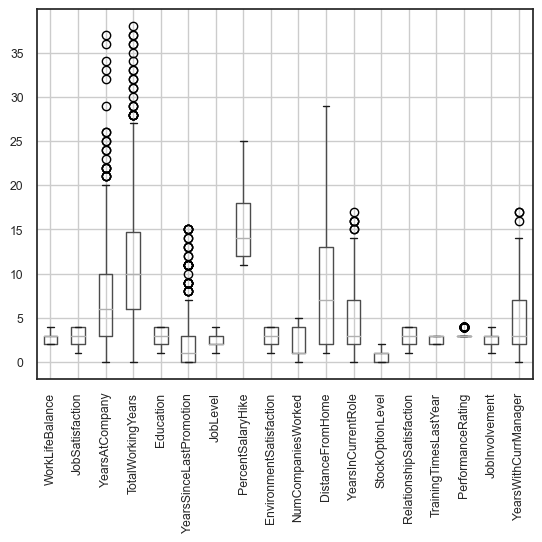

<Figure size 640x480 with 0 Axes>

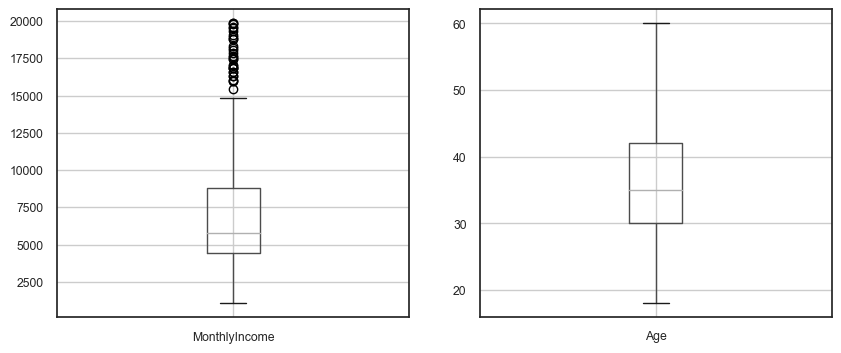

In [732]:
# outlier check for numerical variables

data_Sales.boxplot(column=list(set(numeric_cols) - {"MonthlyIncome", "Age"}), rot = 90) 
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
pd.DataFrame(data_Sales["MonthlyIncome"]).boxplot(column="MonthlyIncome", ax=ax[0])
pd.DataFrame(data_Sales["Age"]).boxplot(column="Age", ax=ax[1])
plt.show()

# potential outliers exist in TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, 
# YearsSinceLastPromotion, TrainingTimesLastYear

In [733]:
# Potential outliers transformed to the max value in each variable
outlier_group_list = ["TotalWorkingYears", "YearsInCurrentRole", "YearsAtCompany", "MonthlyIncome", 
                      "YearsSinceLastPromotion", "YearsWithCurrManager"]

# Here, PerformanceRating only contains 2 categories. Therefore, outliers in PerformanceRating are not removed.

for i in outlier_group_list :
    q1 = np.percentile(data_Sales[i],25)
    q3 = np.percentile(data_Sales[i],75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data_Sales.loc[data_Sales[i] > upper_bound, i] = upper_bound
    data_Sales.loc[data_Sales[i] < lower_bound, i] = lower_bound

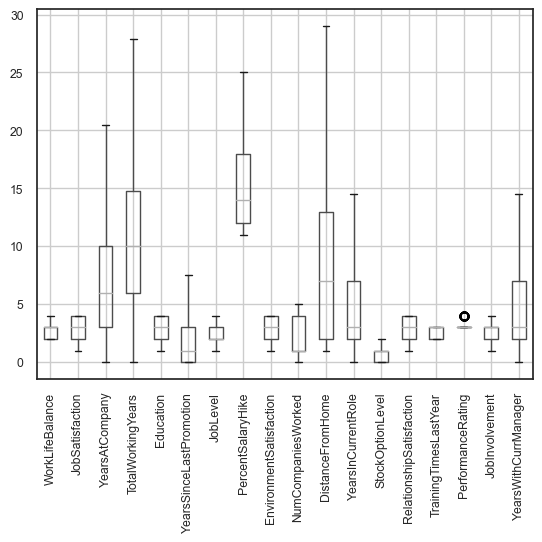

<Figure size 640x480 with 0 Axes>

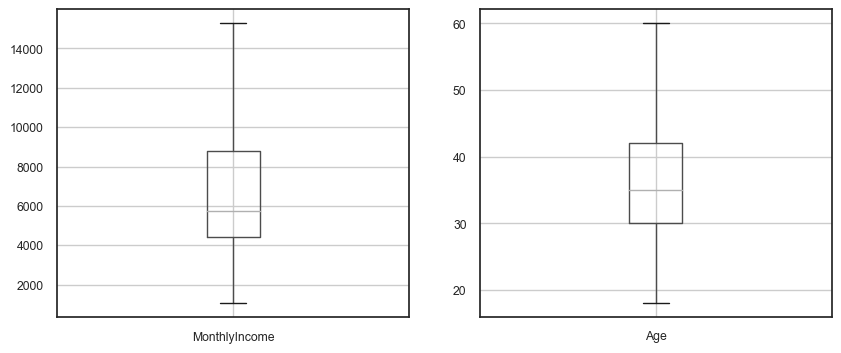

In [734]:
# Boxplot check again
data_Sales.boxplot(column=list(set(numeric_cols) - {"MonthlyIncome", "Age"}), rot = 90) 
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
pd.DataFrame(data_Sales["MonthlyIncome"]).boxplot(column="MonthlyIncome", ax=ax[0])
pd.DataFrame(data_Sales["Age"]).boxplot(column="Age", ax=ax[1])
plt.show()

### 3.1.1.3. Correlation

<Axes: >

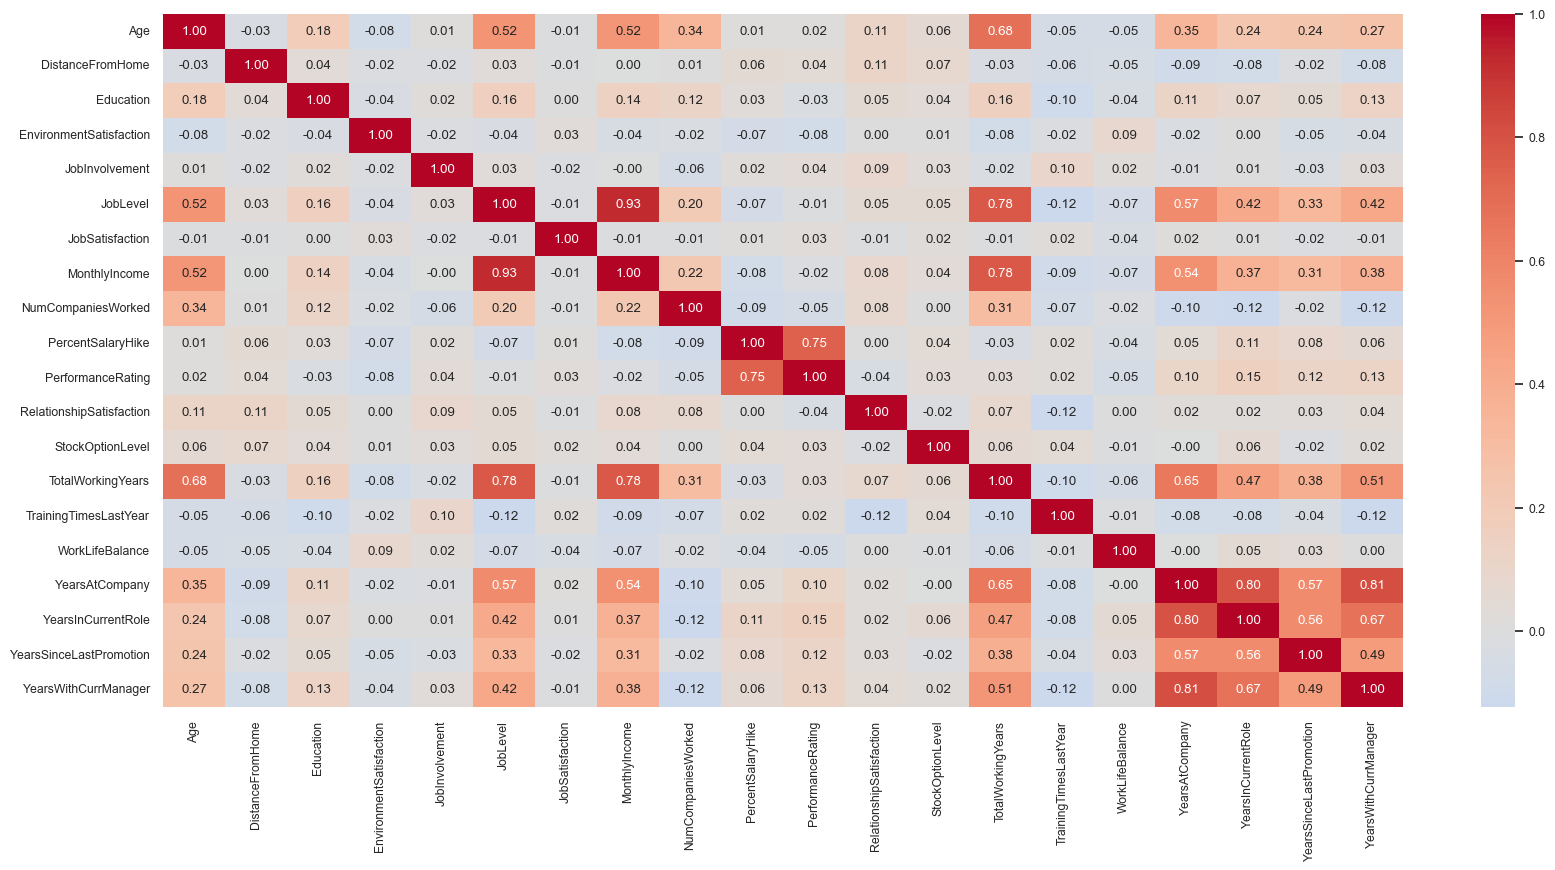

In [735]:
# re-define data after outlier adjustment, and create dummy variables for categorical variables
X_Sales = data_Sales.drop(columns = ["Attrition"])
data_Sales = pd.concat([pd.DataFrame(y_Sales), pd.get_dummies(X_Sales)], axis=1) # dummy creation
X_Sales = data_Sales.drop(columns = ["Attrition"])

# correlation among numerical variables
corr_df = X_Sales[numeric_cols].corr() 
corr_df_x = corr_df.sort_index().sort_index(axis=1) 
plt.figure(figsize=(20,9))
sns.heatmap(corr_df_x, annot=True, fmt=".2f", cmap="coolwarm", center=0) 

# Joblevel, MonthlyIncome seems to be correlated 

<Axes: >

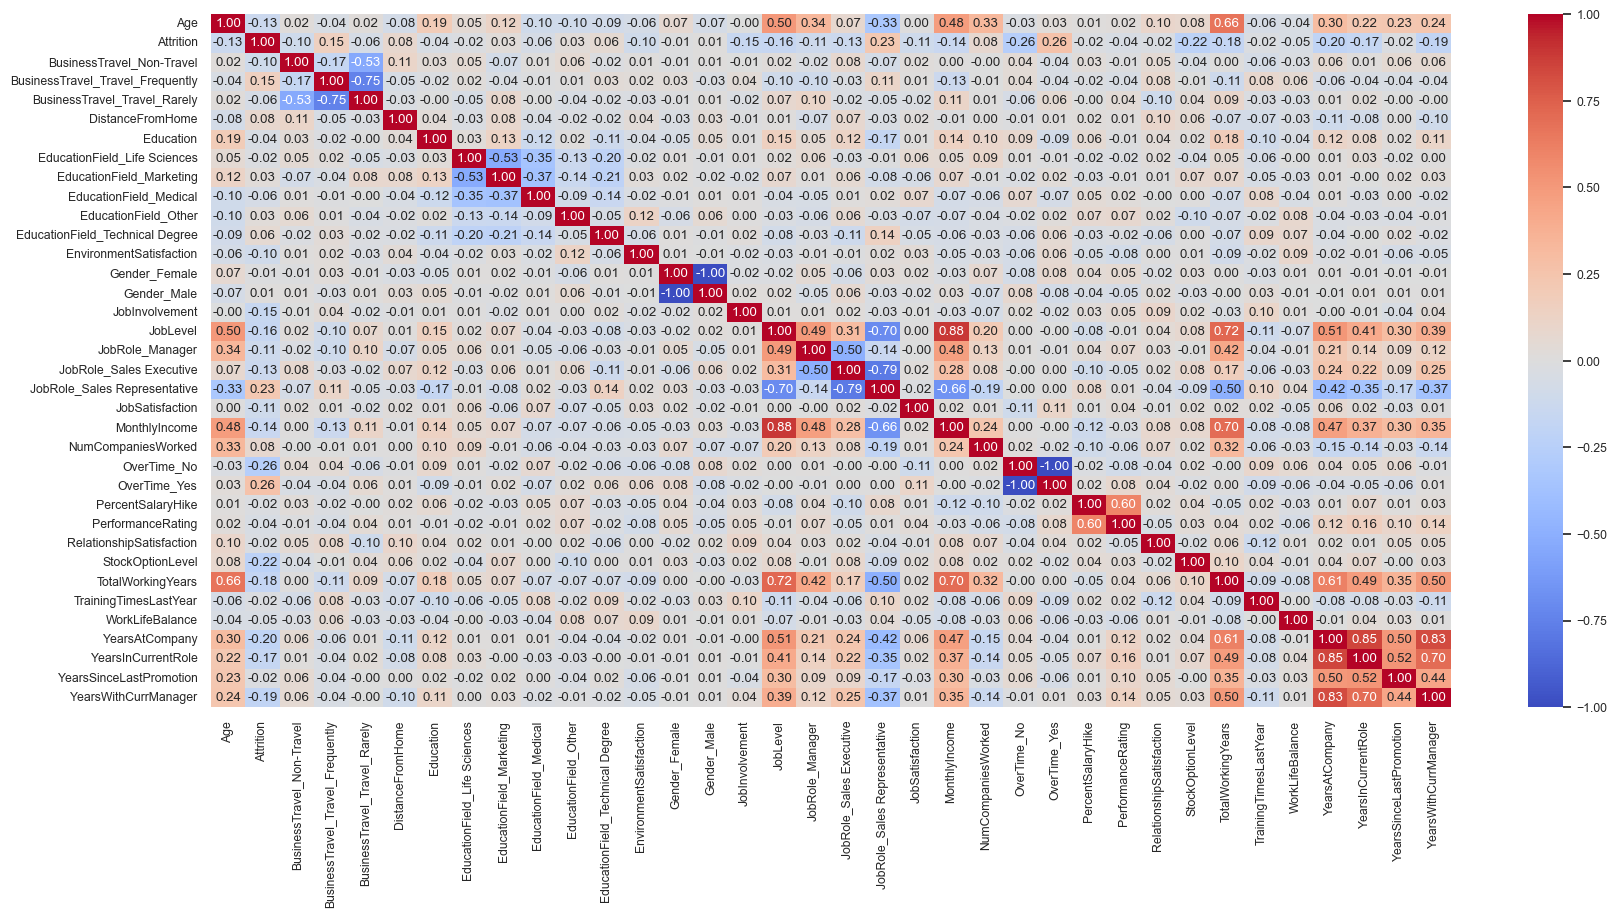

In [736]:
# correlations among all variables, using spearman
corr_df1 = data_Sales.corr(method="spearman")
corr_df_x1 = corr_df1.sort_index().sort_index(axis=1) 
plt.figure(figsize=(20,9))
sns.heatmap(corr_df_x1, annot=True, fmt=".2f", cmap="coolwarm", center=0) 

# No significant correlation exists, even with the target variable

In [737]:
# R result
# table is VIF result in R. As we had a categorical variable, GVIF^(1/(2*Df)) can be considered this time,
# and 3.16 is equivalent to VIF 10 approximately. Therefore, we can assume that there is potential multicollinearity issue 
# when using all predictor variables.(MonthlyIncome with JobLevel)

# > vif(model)
#                               GVIF Df GVIF^(1/(2*Df))
# Age                       2.121023  1        1.456373
# BusinessTravel            1.130681  2        1.031181
# DistanceFromHome          1.086299  1        1.042256
# Education                 1.122443  1        1.059454
# EducationField            1.309129  4        1.034243
# EnvironmentSatisfaction   1.060478  1        1.029795
# Gender                    1.035206  1        1.017451
# JobInvolvement            1.059416  1        1.029279
# JobLevel                  9.206578  1        3.034234
# JobRole                   6.194746  2        1.577633
# JobSatisfaction           1.042912  1        1.021230
# MonthlyIncome            10.931761  1        3.306321
# NumCompaniesWorked        1.458790  1        1.207804
# OverTime                  1.085313  1        1.041783
# PercentSalaryHike         2.416777  1        1.554599
# PerformanceRating         2.411162  1        1.552792
# RelationshipSatisfaction  1.095952  1        1.046877
# StockOptionLevel          1.072509  1        1.035620
# TotalWorkingYears         5.307501  1        2.303801
# TrainingTimesLastYear     1.108385  1        1.052799
# WorkLifeBalance           1.059167  1        1.029158
# YearsAtCompany            5.171889  1        2.274179
# YearsInCurrentRole        2.686525  1        1.639062
# YearsSinceLastPromotion   1.743284  1        1.320335
# YearsWithCurrManager      2.980659  1        1.726459

### 3.1.1.4. PCA, ISOMAP Plot of Sales Department

LinearRegression score : 0.3006 

Cumulative explained variance of 2 PCs (Sales Dept.) : 0.3084


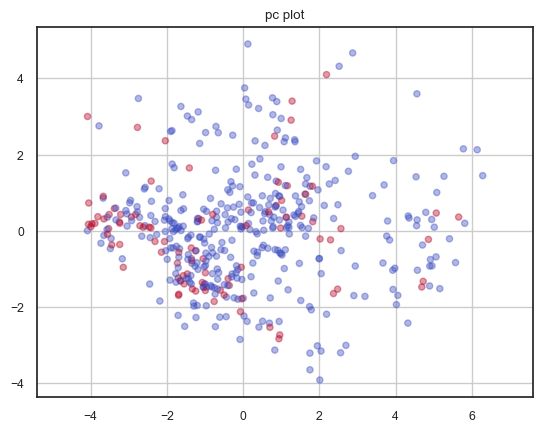

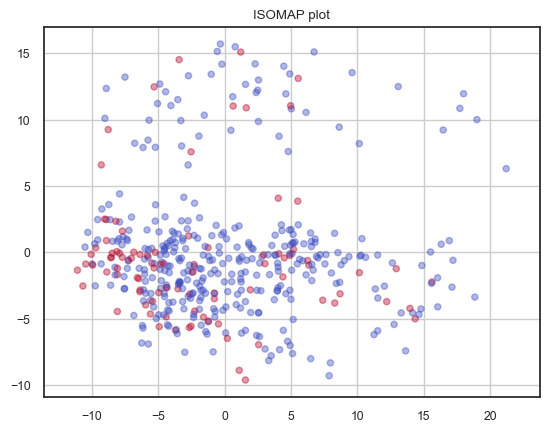

In [740]:
# Check the linearity
X_train, X_test, y_train, y_test = train_test_split(X_Sales, y_Sales, train_size = 0.8, test_size=0.2, random_state=42)

X_train[numeric_cols] = StandardScaler().fit(X_train[numeric_cols]).transform(X_train[numeric_cols]) 
X_test[numeric_cols] = StandardScaler().fit(X_test[numeric_cols]).transform(X_test[numeric_cols])

linear = LinearRegression()
linear.fit(X_train, y_train)
print(f'LinearRegression score : {round(linear.score(X_train, y_train),4)}', "\n") # non - linear


# PCA
X_Sales_pca = X_Sales.copy()
X_Sales_pca[numeric_cols] = StandardScaler().fit(X_Sales_pca[numeric_cols]).transform(X_Sales_pca[numeric_cols]) 

pca = PCA(n_components =2).fit(X_Sales_pca)
pc = pca.transform(X_Sales_pca)
print(f'Cumulative explained variance of 2 PCs (Sales Dept.) : {round(sum(pca.explained_variance_ratio_),4)}') 

plt.figure()
plt.scatter(pc[:,0], pc[:,1], s=20, c=y_Sales, alpha = 0.4, cmap = "coolwarm")
plt.axis('equal')
plt.grid()
plt.title('pc plot')
plt.show() 

# ISOMAP
isomap = Isomap(n_components=2, n_neighbors=5)
X_reduced = isomap.fit_transform(X_Sales_pca)

plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=20, c=y_Sales, alpha = 0.4, cmap = "coolwarm")
plt.axis('equal')
plt.grid()
plt.title('ISOMAP plot')
plt.show() 

In [741]:
print(f'The # of variables including dummy variables is : {len(X_Sales.columns)}')

numerical_cols = X_Sales.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_Sales.select_dtypes(include=['bool']).columns
list(X_Sales.columns)

The # of variables including dummy variables is : 35


['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Manager',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'OverTime_No',
 'OverTime_Yes']

### 3.1.2. Feature Selection 

In [742]:
# In feature selection, we are considering f1 score as a performance metrics here 
# as we are focused on true positive, which is Attrition_Yes.

In [743]:
# modeling function
def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    return metrics(y_test, ypred)
    
# performance metrics function
def metrics(y_test, ypred):
    accuracy = accuracy_score(y_test,ypred)
    precision = precision_score(y_test,ypred)
    recall = recall_score(y_test,ypred)
    f1 = f1_score(y_test,ypred)
    roc_score = roc_auc_score(y_test,ypred,average='macro')
    result = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc' : roc_score}
    return result

# define startified Kfold for CV later
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)

### 3.1.2.1. LASSO

Best model searched for Lasso:
alpha = 0.006194549345149471
intercept = 0.32760778582417804
betas = [-2.51185846e-02  3.40565610e-02  2.29964224e-03 -4.48332182e-02
 -5.34397396e-02  0.00000000e+00 -4.43775679e-02  0.00000000e+00
  4.80184747e-02 -0.00000000e+00 -1.39072880e-02 -5.88631780e-03
 -6.54706001e-02 -3.01489171e-02  0.00000000e+00 -8.21033461e-03
  0.00000000e+00 -5.02721312e-03  3.52601164e-02 -2.59055198e-02
 -4.81921600e-02  1.09225733e-01 -0.00000000e+00 -0.00000000e+00
  1.22267722e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.63425188e-04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.27908403e-01 -2.31297388e-01  8.75871702e-16], 


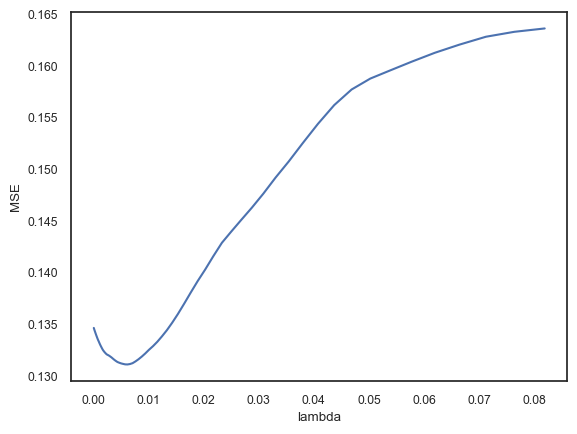

LASSO CV MSE best result : lambda = 0.006194549345149471, MSE = 0.1311292837502472


variable          coef
0                                Age -2.511858e-02
1                   DistanceFromHome  3.405656e-02
2                          Education  2.299642e-03
3            EnvironmentSatisfaction -4.483322e-02
4                     JobInvolvement -5.343974e-02
5                           JobLevel  0.000000e+00
6                    JobSatisfaction -4.437757e-02
7                      MonthlyIncome  0.000000e+00
8                 NumCompaniesWorked  4.801847e-02
9                  PercentSalaryHike -0.000000e+00
10                 PerformanceRating -1.390729e-02
11          RelationshipSatisfaction -5.886318e-03
12                  StockOptionLevel -6.547060e-02
13                 TotalWorkingYears -3.014892e-02
14             TrainingTimesLastYear  0.000000e+00
15                   WorkLifeBalance -8.210335e-03
16                    YearsAtCompany  0.000000e+00
17                YearsInCurrentRole -5.027213e-03
18           YearsSinceLastPromotion  3.526012e-02
19              YearsWithCurrManager -2.590552e-02
20         BusinessTravel_Non-Travel -4.819216e-02
21  BusinessTravel_Travel_Frequently  1.092257e-01
22      BusinessTravel_Travel_Rarely -0.000000e+00
23      EducationField_Life Sciences -0.000000e+00
24          EducationField_Marketing  1.222677e-02
25            EducationField_Medical -0.000000e+00
26              EducationField_Other  0.000000e+00
27   EducationField_Technical Degree  0.000000e+00
28                     Gender_Female -1.634252e-04
29                       Gender_Male  0.000000e+00
30                   JobRole_Manager -0.000000e+00
31           JobRole_Sales Executive -0.000000e+00
32      JobRole_Sales Representative  1.279084e-01
33                       OverTime_No -2.312974e-01
34                      OverTime_Yes  8.758717e-16

In [744]:
# splitter = KFold(10, random_state=42, shuffle=True) # 10-fold crossvalidation
lasso_model = LassoCV(cv = stratified_kfold, random_state=42, max_iter=10000) 

X_Sales_lasso = X_Sales.copy() 

# # split and scale the data
# X_train, X_test, y_train, y_test = train_test_split(X_Sales, y_Sales, train_size = 0.8, test_size=0.2, random_state=42)

# X_train[numeric_cols] = StandardScaler().fit(X_train[numeric_cols]).transform(X_train[numeric_cols]) 
# X_test[numeric_cols] = StandardScaler().fit(X_test[numeric_cols]).transform(X_test[numeric_cols])
X_Sales_lasso[numeric_cols] = StandardScaler().fit(X_Sales_lasso[numeric_cols]).transform(X_Sales_lasso[numeric_cols]) 

# # SMOTE
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
# sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])

# X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
# X_Sales_smt, X_Sales_smt = sm.fit_resample(X_Sales_lasso, y_Sales)


# LASSO : find the optimal parameter lambda
lasso_model.fit(X_Sales_lasso, y_Sales)

print("Best model searched for Lasso:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(lasso_model.alpha_,
                                                                            lasso_model.intercept_,
                                                                            lasso_model.coef_
                                                                            ))
# LASSO CV MSE check
lasso_cv_min_mse_idx = np.argmin(np.mean(lasso_model.mse_path_,axis=1))
lasso_cv_mse = np.mean(lasso_model.mse_path_,axis=1)
plt.figure()
plt.plot(lasso_model.alphas_, lasso_cv_mse)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.show()
print(f'LASSO CV MSE best result : lambda = {lasso_model.alpha_}, MSE = {lasso_cv_mse[lasso_cv_min_mse_idx]}')


# LASSO : optimal parameter lambda fitting to the model
lasso_opt_model = Lasso(alpha=lasso_model.alpha_)
lasso_opt_model.fit(X_Sales_lasso, y_Sales) 

lasso_coef_df = pd.DataFrame({"variable" :list(X_Sales_lasso.columns), "coef":lasso_opt_model.coef_,})
lasso_coef_df

In [745]:
# Non-selected variables
non_selected_var_lasso = list(lasso_coef_df[lasso_coef_df["coef"]==0]["variable"].values)
print(f'The {len(non_selected_var_lasso)} non-selected variables from LASSO : {non_selected_var_lasso}')

The 13 non-selected variables from LASSO : ['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Manager', 'JobRole_Sales Executive']


In [746]:
selected_var_lasso =list(X_Sales_lasso.drop(columns=non_selected_var_lasso).columns)

print(f'The {len(selected_var_lasso)} selected variables from LASSO : {list(selected_var_lasso)}')

The 22 selected variables from LASSO : ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'EducationField_Marketing', 'Gender_Female', 'JobRole_Sales Representative', 'OverTime_No', 'OverTime_Yes']


In [747]:
# Selected variables applied to Logistic model
X_Sales_lasso_opt = X_Sales_lasso.drop(columns=non_selected_var_lasso) 
X_Sales_lasso_numeric_cols = X_Sales_lasso_opt.select_dtypes(include=['int64', 'float64']).columns

# # Find categorical column indices for SMOTENC
# smotenc_cate_feature1 = [ind for ind, tf in enumerate(X_Sales_lasso_opt.dtypes == bool) if tf == True]

# LASSO
lasso_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'roc_auc' : 0}

np.random.seed(42)

# Test on Logistic regression with 50 different split
for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_Sales_lasso_opt, y_Sales, train_size = 0.8, test_size=0.2)

    X_train[X_Sales_lasso_numeric_cols] = StandardScaler().fit(X_train[X_Sales_lasso_numeric_cols]).\
    transform(X_train[X_Sales_lasso_numeric_cols]) 
    X_test[X_Sales_lasso_numeric_cols] = StandardScaler().fit(X_test[X_Sales_lasso_numeric_cols]).\
    transform(X_test[X_Sales_lasso_numeric_cols]) 
        
#     # SMOTE
#     sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
#     sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature1, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
#     X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    logit = LogisticRegression()
#     lasso_logit_fit = logit.fit(X_train_smt, y_train_smt).predict_proba(X_test)
#     lasso_logit_roc = roc_auc_score(y_test, lasso_logit_fit[:,1])
    lasso_metrics = modeling(logit, X_train, X_test, y_train, y_test)
    for metric, score in lasso_metrics.items() :
        lasso_result[metric] += score

print("Logistic Regression (cv=50) result, using selected variables from LASSO :")
{key: value / 50 for key, value in lasso_result.items()}

Logistic Regression (cv=50) result, using selected variables from LASSO :


{'accuracy': 0.8539999999999998,
 'precision': 0.7065240304071574,
 'recall': 0.49627016308275557,
 'f1': 0.5755930942161293,
 'roc_auc': 0.7218274090448624}

### 3.1.2.2. SelectKbest (Mutual Information, Chi-Squared, ANOVA)

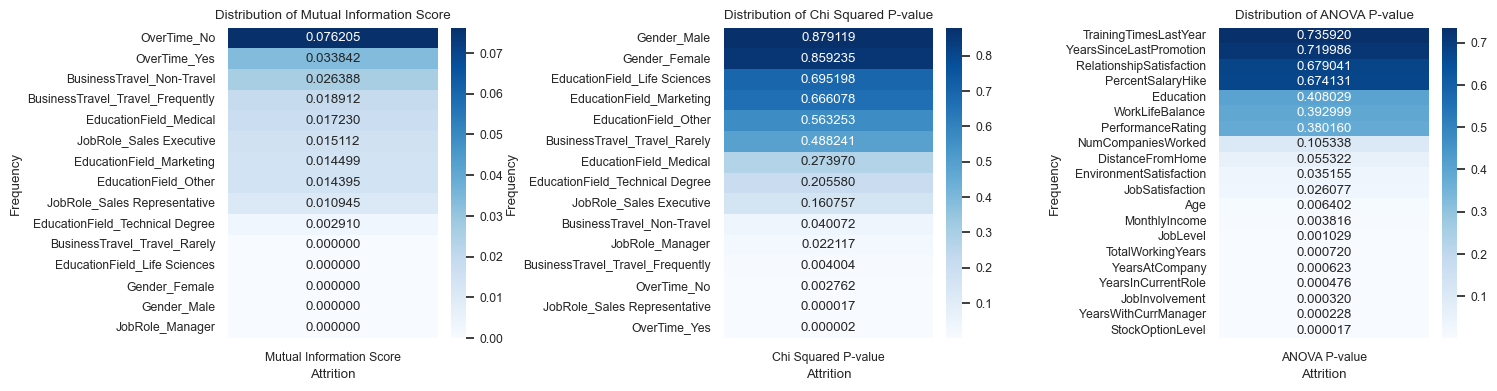

In [748]:
np.random.seed(42)

# # split and scale the data
# X_train, X_test, y_train, y_test = train_test_split(X_Sales, y_Sales, train_size = 0.8, test_size=0.2, random_state=42)

# # scaling numerical variables
# X_train[numeric_cols] = StandardScaler().fit(X_train[numeric_cols]).transform(X_train[numeric_cols]) 
# X_test[numeric_cols] = StandardScaler().fit(X_test[numeric_cols]).transform(X_test[numeric_cols])

# # SMOTE
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
# # sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, 
# #              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
# X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

# filter categorical variables (Mutual Information)
kbest_MI = SelectKBest(score_func = mutual_info_classif, k = 'all')
# kbest_MI_fit = kbest_MI.fit(X_train_smt[categorical_cols], y_train_smt)
kbest_MI_fit = kbest_MI.fit(X_Sales[categorical_cols], y_Sales) 

kbest_MI_result = pd.DataFrame(data = kbest_MI_fit.scores_, index = list(X_Sales[categorical_cols].columns), 
                             columns = ['Mutual Information Score']).sort_values(by = "Mutual Information Score", 
                                                                                 ascending=False)  # MI gives only score

# filter categorical variables (Chi Squared)
kbest_chi = SelectKBest(score_func = chi2, k = 'all')
# kbest_chi_fit = kbest_chi.fit(X_train_smt[categorical_cols], y_train_smt)
kbest_chi_fit = kbest_chi.fit(X_Sales[categorical_cols], y_Sales)


kbest_chi_result = pd.DataFrame(data = kbest_chi_fit.pvalues_, index = list(X_Sales[categorical_cols].columns), 
                             columns = ['Chi Squared P-value']).sort_values(by = "Chi Squared P-value", ascending=False) \
                                # Chi Sqaured p value 

# filter numerical variables (ANOVA)
kbest_anova = SelectKBest(score_func = f_classif, k = 'all')
# kbest_anova_fit = kbest_anova.fit(X_train_smt[numerical_cols], y_train_smt)

# numerical variables scaling
X_Sales_anova = X_Sales.copy()
X_Sales_anova[numeric_cols] = StandardScaler().fit(X_Sales_anova[numeric_cols]).transform(X_Sales_anova[numeric_cols]) 

kbest_anova_fit = kbest_anova.fit(X_Sales_anova[numerical_cols], y_Sales)


kbest_anova_result = pd.DataFrame(data = kbest_anova_fit.pvalues_, index = list(X_Sales_anova[numerical_cols].columns), 
                             columns = ['ANOVA P-value']).sort_values(by = "ANOVA P-value", ascending=False) 

kbest_results = [kbest_MI_result, kbest_chi_result, kbest_anova_result]

plt.figure(figsize=(15, 1 * 4)) 

for i, kbest in enumerate(kbest_results, 1): 
    plt.subplot(1, 3, i)  
    sns.heatmap(kbest, cmap="Blues", annot=True, fmt="f")
    plt.title(f"Distribution of {list(kbest.columns)[0]}")
    plt.xlabel("Attrition")
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Based on the results, the MI result implies none of the categorical variables has much relation with Attrition
# the Chi-squared result indicates that some categorical variables significant 
# the ANOVA result shows that some variables are not significant

In [749]:
kbest_selected_categorical = kbest_chi_result[(kbest_chi_result <= 0.05).any(axis=1)].index 
kbest_selected_numerical = kbest_anova_result[(kbest_anova_result <= 0.05).any(axis=1)].index

kbest_selected_cols = list(kbest_selected_categorical) + list(kbest_selected_numerical)
print(f'The {len(kbest_selected_cols)} selected variables from SelectKbest : {kbest_selected_cols}', "\n")

kbest_nonselected_cols = list(set(X_Sales.columns) - set(kbest_selected_cols))
print(f'The {len(kbest_nonselected_cols)} non-selected variables from SelectKbest : {kbest_nonselected_cols}')

The 17 selected variables from SelectKbest : ['BusinessTravel_Non-Travel', 'JobRole_Manager', 'BusinessTravel_Travel_Frequently', 'OverTime_No', 'JobRole_Sales Representative', 'OverTime_Yes', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'JobInvolvement', 'YearsWithCurrManager', 'StockOptionLevel'] 

The 18 non-selected variables from SelectKbest : ['WorkLifeBalance', 'BusinessTravel_Travel_Rarely', 'NumCompaniesWorked', 'Gender_Male', 'EducationField_Medical', 'PerformanceRating', 'DistanceFromHome', 'EducationField_Technical Degree', 'Gender_Female', 'YearsSinceLastPromotion', 'JobRole_Sales Executive', 'EducationField_Other', 'EducationField_Marketing', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'EducationField_Life Sciences', 'Education', 'PercentSalaryHike']


In [750]:
# Applying to Logistic Regression, using selected variables form Kbest
X_Sales_kbest = X_Sales[kbest_selected_cols]

# Find categorical column indices for SMOTENC
# smotenc_cate_feature2 = [ind for ind, tf in enumerate(X_Sales_kbest.dtypes == bool) if tf == True]

# Kbest result
kbest_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'roc_auc' : 0}

np.random.seed(42)

# Test on Logistic regression with 50 different split
for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_Sales_kbest, y_Sales, train_size = 0.8, test_size=0.2)

    X_train[kbest_selected_numerical] = StandardScaler().fit(X_train[kbest_selected_numerical]).\
    transform(X_train[kbest_selected_numerical]) 
    X_test[kbest_selected_numerical] = StandardScaler().fit(X_test[kbest_selected_numerical]).\
    transform(X_test[kbest_selected_numerical]) 
        
    # SMOTE
#     sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
#     sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature2, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
#     X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    logit = LogisticRegression()
    kbest_metrics = modeling(logit, X_train, X_test, y_train, y_test)
    for metric, score in kbest_metrics.items() :
        kbest_result[metric] += score

print("Logistic Regression (cv=50) result, using selected variables from Kbest :")
{key: value / 50 for key, value in kbest_result.items()}

Logistic Regression (cv=50) result, using selected variables from Kbest :


{'accuracy': 0.8388888888888887,
 'precision': 0.6862898833192952,
 'recall': 0.4072185498427926,
 'f1': 0.501015101794596,
 'roc_auc': 0.6794370705722993}

### 3.1.2.3. Tree-based Selection method

In [751]:
# Random Forest 
clf_result_num = {}

# check different number of the variables used
for i in range(len(X_Sales.columns)) :
    clf = RandomForestClassifier(n_estimators=100)
    
    clf_fit = clf.fit(X_Sales, y_Sales) # no scaling needed for RF
    clf_features = pd.DataFrame(clf_fit.feature_importances_, index=list(X_Sales.columns), 
                                columns=["features"]).sort_values(by="features", ascending=False)
    clf_selected_features = clf_features.head(i+1).index 
    X_Sales_clf = X_Sales[clf_selected_features] # after finding the features, use it on original data(not resampled)
    X_Sales_clf_numeric = X_Sales_clf.select_dtypes(include=("int64", "float")).columns

    clf_result = []
    clf_coef = {}

#     smotenc_cate_feature3 = [ind for ind, tf in enumerate(X_Sales_clf.dtypes == bool) if tf == True]
    
    np.random.seed(42)
    
    # run CV with Logistic Regression for each different number of variables
    for c in range(50) :
        X_train, X_test, y_train, y_test = train_test_split(X_Sales_clf, y_Sales, train_size = 0.8, test_size=0.2)

        X_train[X_Sales_clf_numeric] = StandardScaler().fit(X_train[X_Sales_clf_numeric]).transform(X_train[X_Sales_clf_numeric])
        X_test[X_Sales_clf_numeric] = StandardScaler().fit(X_test[X_Sales_clf_numeric]).transform(X_test[X_Sales_clf_numeric]) 

        # SMOTE
#         sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
#         sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature3, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
#         X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
        
        logit = LogisticRegression()
        clf_fit = logit.fit(X_train, y_train).predict(X_test)
        clf_f1 = f1_score(y_test, clf_fit)
        clf_result.append(clf_f1)
        clf_coef[c]=clf.feature_importances_
    clf_result_num[i+1] = np.mean(clf_result)

print(clf_result_num)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.00396135265700483, 6: 0.09894798912966904, 7: 0.1048818427062336, 8: 0.10849726188870455, 9: 0.2399240130429904, 10: 0.23193074614850173, 11: 0.274754558138576, 12: 0.42167424887883925, 13: 0.424328020091342, 14: 0.4693219738249333, 15: 0.47119262936943845, 16: 0.4770208806217855, 17: 0.5046034972127901, 18: 0.4921429825079304, 19: 0.49484299321489333, 20: 0.5009020058118364, 21: 0.5222767622880682, 22: 0.5281148494919364, 23: 0.5681164508715449, 24: 0.5665345108004365, 25: 0.5598318465147286, 26: 0.5549440019213382, 27: 0.5555544651943848, 28: 0.5540414613858643, 29: 0.5544404189758528, 30: 0.5528719792290759, 31: 0.5509116583446582, 32: 0.5591291934920625, 33: 0.5612588262802116, 34: 0.5584679534339849, 35: 0.5575473650472631}


In [752]:
max_key = max(clf_result_num, key=clf_result_num.get)
max_value = clf_result_num[max_key]
max_key, max_value
print(f"Logistic Regression (cv=50) result, {max_key} variables with f1 score of {max_value} from Random Forest Classifier")

Logistic Regression (cv=50) result, 23 variables with f1 score of 0.5681164508715449 from Random Forest Classifier


In [753]:
clf = RandomForestClassifier(n_estimators=100)
clf_fit = clf.fit(X_Sales, y_Sales)
clf_features = pd.DataFrame(clf_fit.feature_importances_, index=list(X_Sales.columns), 
                            columns=["features"]).sort_values(by="features", ascending=False)
clf_selected_features = list(clf_features.head(max_key).index)

print(f'The {len(clf_selected_features)} selected variables from Random Forest Classifier : {clf_selected_features}', "\n")
rf_nonselected_cols = list(set(X_Sales.columns) - set(X_Sales[clf_selected_features]))
print(f'The {len(rf_nonselected_cols)} non-selected variables from Random Forest Classifier : {rf_nonselected_cols}')

The 23 selected variables from Random Forest Classifier : ['MonthlyIncome', 'DistanceFromHome', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'StockOptionLevel', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'JobInvolvement', 'YearsWithCurrManager', 'JobSatisfaction', 'OverTime_Yes', 'YearsInCurrentRole', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'OverTime_No', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'Education', 'JobLevel', 'JobRole_Sales Representative', 'EducationField_Marketing', 'BusinessTravel_Travel_Frequently'] 

The 12 non-selected variables from Random Forest Classifier : ['JobRole_Manager', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'EducationField_Medical', 'PerformanceRating', 'BusinessTravel_Non-Travel', 'EducationField_Technical Degree', 'Gender_Female', 'JobRole_Sales Executive', 'EducationField_Other', 'TrainingTimesLastYear', 'EducationField_Life Sciences']


### 3.1.2.4 Forward Feature Selection Method

In [754]:
logit = LogisticRegression(max_iter=3000)
np.random.seed(42)
sfs = SequentialFeatureSelector(logit, direction="forward", scoring='f1', cv=stratified_kfold, n_features_to_select='auto')
# backward too slow

# numerical variables scaling
X_Sales_sfs = X_Sales.copy()
X_Sales_sfs[numeric_cols] = StandardScaler().fit(X_Sales_sfs[numeric_cols]).transform(X_Sales_sfs[numeric_cols]) 

sfs_fit = sfs.fit(X_Sales_sfs, y_Sales) 

selected_sfs = list(sfs_fit.get_feature_names_out())
print(f'The {len(selected_sfs)} selected variables are {selected_sfs}')

The 17 selected variables are ['Age', 'DistanceFromHome', 'Education', 'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'EducationField_Technical Degree', 'JobRole_Manager', 'OverTime_No', 'OverTime_Yes']


In [755]:
non_selected_sfs = list(set(X_Sales_sfs.columns)-set(list(sfs_fit.get_feature_names_out())))
print(f'The {len(non_selected_sfs)} non-selected variables are {non_selected_sfs}')

The 18 non-selected variables are ['WorkLifeBalance', 'JobRole_Sales Representative', 'Gender_Male', 'TotalWorkingYears', 'EducationField_Medical', 'PerformanceRating', 'Gender_Female', 'BusinessTravel_Travel_Frequently', 'MonthlyIncome', 'JobRole_Sales Executive', 'EducationField_Other', 'YearsInCurrentRole', 'EducationField_Marketing', 'TrainingTimesLastYear', 'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction', 'PercentSalaryHike']


In [756]:
# Apply the selected variables to Logistic Regression (cv=50)

X_Sales_sfs_opt = X_Sales_sfs[selected_sfs] # after finding the features, use it on original data(not resampled)
X_Sales_sfs_opt_numeric = X_Sales_sfs_opt.select_dtypes(include=['int64', 'float64']).columns

# sfs result
sfs_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'roc_auc' : 0}

np.random.seed(42)

# smotenc_cate_feature3 = [ind for ind, tf in enumerate(X_Sales_sfs_opt.dtypes == bool) if tf == True]

for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_Sales_sfs_opt, y_Sales, train_size = 0.8, test_size=0.2)

    X_train[X_Sales_sfs_opt_numeric] = StandardScaler().fit(X_train[X_Sales_sfs_opt_numeric]).transform(X_train[X_Sales_sfs_opt_numeric]) 
    X_test[X_Sales_sfs_opt_numeric] = StandardScaler().fit(X_test[X_Sales_sfs_opt_numeric]).transform(X_test[X_Sales_sfs_opt_numeric])
    
#     # SMOTE
#     sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
#     sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature3, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
#     X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    logit = LogisticRegression()
    sfs_metrics = modeling(logit, X_train, X_test, y_train, y_test)
    for metric, score in sfs_metrics.items() :
        sfs_result[metric] += score

print("Logistic Regression (cv=50) result, using selected variables from Kbest :")
{key: value / 50 for key, value in sfs_result.items()}

Logistic Regression (cv=50) result, using selected variables from Kbest :


{'accuracy': 0.8424444444444446,
 'precision': 0.7288300588300592,
 'recall': 0.3754769973075936,
 'f1': 0.4847785886780468,
 'roc_auc': 0.6695629242294445}

### 3.1.2.5. Using All variables

In [757]:
# Apply the selected variables to Logistic Regression (cv=50)

# data = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
# data = data.loc[data["Department"]=="Sales",].drop(columns = ["Department"])
# data = data.drop(columns = ["EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate",  
#                             "MaritalStatus", "Over18", "StandardHours"])
# X_Sales_all = pd.get_dummies(data.drop(columns=["Attrition"]))
# y_temp = data["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)

X_Sales_all = X_Sales.copy() # after finding the features, use it on original data(not resampled)
X_Sales_all_numeric = X_Sales_all.select_dtypes(include=['int64', 'float64']).columns

# all result
all_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'roc_auc' : 0}

np.random.seed(42)

# smotenc_cate_feature3 = [ind for ind, tf in enumerate(X_Sales_sfs.dtypes == bool) if tf == True]

for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_Sales_all, y_Sales, train_size = 0.8, test_size=0.2)

    X_train[X_Sales_all_numeric] = StandardScaler().fit(X_train[X_Sales_all_numeric]).transform(X_train[X_Sales_all_numeric]) 
    X_test[X_Sales_all_numeric] = StandardScaler().fit(X_test[X_Sales_all_numeric]).transform(X_test[X_Sales_all_numeric])
    
#     # SMOTE
#     sm = SMOTE(random_state=42, sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])
#     sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature3, 
#              sampling_strategy=gcv_result_smnc.best_params_["smotenc__sampling_strategy"])
#     X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    logit = LogisticRegression()
    all_metrics = modeling(logit, X_train, X_test, y_train, y_test)
    for metric, score in all_metrics.items() :
        all_result[metric] += score

print("Logistic Regression (cv=50) result, using selected variables from Kbest :")
{key: value / 50 for key, value in all_result.items()}

Logistic Regression (cv=50) result, using selected variables from Kbest :


{'accuracy': 0.8484444444444443,
 'precision': 0.6819834005863418,
 'recall': 0.48416589806672583,
 'f1': 0.5575473650472631,
 'roc_auc': 0.7137859105869182}

### The selected variables from LASSO method yield the best result

LinearRegression score : 0.2945 

Cumulative explained variance of 2 PCs (Sales Dept.) : 0.2801


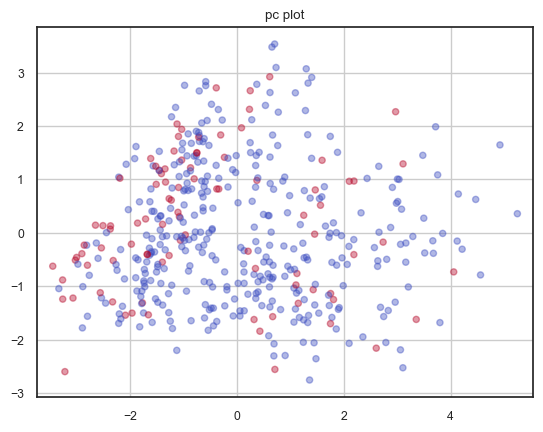

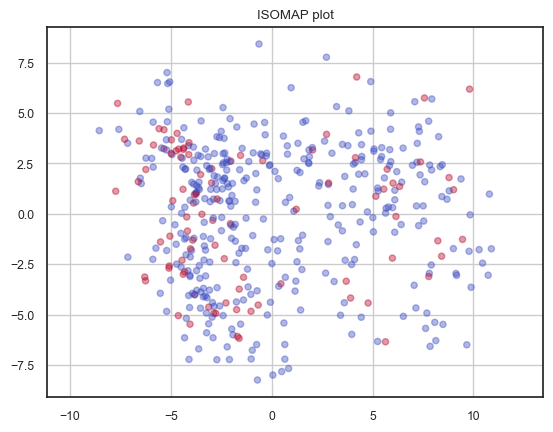

In [758]:
# The selected variables from LASSO yield the best result
# PCA, ISOMAP plot with the selected variables from RF

X_Sales_final = X_Sales[selected_var_lasso].copy()
X_Sales_final_numerical_col = X_Sales_final.select_dtypes(include = ["float64", "int64"]).columns
X_Sales_final[X_Sales_final_numerical_col] = StandardScaler().fit(X_Sales_final[X_Sales_final_numerical_col]).\
                                                transform(X_Sales_final[X_Sales_final_numerical_col]) 

linear = LinearRegression()
linear.fit(X_Sales_final, y_Sales)
print(f'LinearRegression score : {round(linear.score(X_Sales_final, y_Sales),4)}', "\n") # non - linear


# PCA
pca = PCA(n_components =2).fit(X_Sales_final)
pc = pca.transform(X_Sales_final)
print(f'Cumulative explained variance of 2 PCs (Sales Dept.) : {round(sum(pca.explained_variance_ratio_),4)}') 

plt.figure()
plt.scatter(pc[:,0], pc[:,1], s=20, c=y_Sales, alpha = 0.4, cmap = "coolwarm")
plt.axis('equal')
plt.grid()
plt.title('pc plot')
plt.show() 

# ISOMAP
isomap = Isomap(n_components=2, n_neighbors=5)
X_reduced = isomap.fit_transform(X_Sales_final)

plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=20, c=y_Sales, alpha = 0.4, cmap = "coolwarm")
plt.axis('equal')
plt.grid()
plt.title('ISOMAP plot')
plt.show() 

In [760]:
X_Sales_final.info()
# X_Sales_final_categorical_cols = X_Sales_final.select_dtypes(include=['bool']).columns

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               446 non-null    float64
 1   DistanceFromHome                  446 non-null    float64
 2   Education                         446 non-null    float64
 3   EnvironmentSatisfaction           446 non-null    float64
 4   JobInvolvement                    446 non-null    float64
 5   JobSatisfaction                   446 non-null    float64
 6   NumCompaniesWorked                446 non-null    float64
 7   PerformanceRating                 446 non-null    float64
 8   RelationshipSatisfaction          446 non-null    float64
 9   StockOptionLevel                  446 non-null    float64
 10  TotalWorkingYears                 446 non-null    float64
 11  WorkLifeBalance                   446 non-null    float64
 12  YearsInCurre

### SMOTE

In [761]:
## Before diving into feature modeling, as our data is imbalanced, it's better to deal with resampling method.
# Here, using oversampling method SMOTE, we can mitigate the impact of imbalanced data

In [762]:
weights = list(np.linspace(0.3, 1.0, 50))

smote_pipe = Pipeline([('smote', SMOTE(random_state=42)),
                       ('scale', StandardScaler()),
                         ('logit', LogisticRegression(random_state=42, max_iter = 5000))])

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)

gcv_sm = GridSearchCV(estimator = smote_pipe, param_grid = {'smote__sampling_strategy' : weights}, scoring = 'f1', 
                   cv = stratified_kfold, error_score='raise')

gcv_result_sm = gcv_sm.fit(X_Sales_final, y_Sales) 
print(f'The best resampling ratio is {gcv_result_sm.best_params_["smote__sampling_strategy"]}, yielding score of ' 
      f'{gcv_result_sm.best_score_}')

The best resampling ratio is 0.5571428571428572, yielding score of 0.6299469931513275


### SMOTENC

In [763]:
# Find categorical column indices for SMOTENC
smotenc_cate_feature = [ind for ind, tf in enumerate(X_Sales_final.dtypes == bool) if tf == True]
smotenc_cate_feature

[15, 16, 17, 18, 19, 20, 21]

In [764]:
# weights = list(np.linspace(0.29, 0.35, 50))
weights = list(np.linspace(0.7, 1.0, 50))

smotenc_pipe = Pipeline([('smotenc', SMOTENC(random_state=42, categorical_features = smotenc_cate_feature)), 
                         ('scale', StandardScaler()),
                         ('logit', LogisticRegression(random_state=42, max_iter = 5000))])

gcv_smnc = GridSearchCV(estimator = smotenc_pipe, param_grid = {'smotenc__sampling_strategy' : weights}, scoring = 'f1', 
                   cv = stratified_kfold, error_score='raise')

gcv_result_smnc = gcv_smnc.fit(X_Sales_final, y_Sales) 
print(f'The best resampling ratio is {gcv_result_smnc.best_params_["smotenc__sampling_strategy"]}, yielding score of ' 
      f'{gcv_result_smnc.best_score_}')

The best resampling ratio is 0.736734693877551, yielding score of 0.5784539610324513


### 3.1.3 Modeling

### 3.1.3.1. Parameter Tuning

In [765]:
np.random.seed(42)
model_params = {
                "logit" : {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                                    sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('logit', LogisticRegression(random_state=42, tol=1.0e-2, max_iter=5000, 
                                                                         solver='lbfgs'))]), # lbfgs  the best
                                            'params' : {'logit__penalty': ["l2"], 
                                                        'logit__C' : [0.025, 0.03, 0.035]}},
                "SVM" : {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('nomal', MinMaxScaler()),
                                            ('SVM', SVC(random_state=42, tol=1.0e-2, max_iter=100000))]),
                          'params' : {'SVM__kernel': ["linear", "rbf", "sigmoid", "poly"], 
                                      'SVM__gamma' : ["auto", "scale"], 
                                     'SVM__class_weight' : ["balanced", None], 
                                     'SVM__C' : [8, 9, 10, 11, 12]}},
                "LGBM" : {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('LGBM', lgb.LGBMClassifier(random_state=42))]),
                          'params' : {'LGBM__num_leaves' : [2, 3, 4],
                                      'LGBM__n_estimators':[2000, 2500, 3000, 3500],
                                      'LGBM__learning_rate': [0.005],
                                      'LGBM__verbosity':[-1]}},
                "XGB": {'model': Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('XGB', XGBClassifier(random_state=42))]),
                        'params': { 'XGB__learning_rate': [0.005],
                                    'XGB__n_estimators': [1500, 2000, 2500] , 
                                    'XGB__max_depth':[2, 3, 4]}},
                "AdaBoost": {'model': Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('AdaBoost', AdaBoostClassifier(random_state=42))]),
                        'params': {'AdaBoost__estimator': [DecisionTreeClassifier(max_depth=i) for i in range(2,10,2)], 
                                   'AdaBoost__n_estimators':[1, 2, 3, 4],
                                   'AdaBoost__learning_rate':[0.005]}},
                "RF": {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('RF', RandomForestClassifier(random_state=42))]),
                       'params' : {'RF__n_estimators' : [4, 5, 6, 7],
                                   'RF__min_samples_split' : [2, 3, 4],
                                   'RF__max_depth' : [2, 3, 4]}},
                "MLP": {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('MLP', MLPClassifier(random_state=42, max_iter =1000, tol=1e-2))]),
                       'params' : {'MLP__learning_rate_init' : [0.005],
                                   'MLP__hidden_layer_sizes' : [(20, ), (19, ), (20, 5), (19, 5)],
                                   'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu'],
                                    'MLP__solver' : ['lbfgs', 'sgd', 'adam']}},
                "lda" : {'model' : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('lda', LinearDiscriminantAnalysis(tol=1.0e-2))]),
                          'params' : {'lda__solver': ["svd", "lsqr", "eigen"]}}}

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X_Sales_final, y_Sales, train_size = 0.8, test_size=0.2, random_state=42)

best_para = []
best_score = []
test_score = []
grid_cm = {}
best_coef = {}

np.random.seed(42)

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)

for name, model in model_params.items() :
    grid_cv = GridSearchCV(model['model'], model['params'], cv=stratified_kfold, scoring='f1')
    grid_cv.fit(X_train, y_train) 
    
    best_para.append(grid_cv.best_params_) 
    best_score.append(grid_cv.best_score_) 
    
    # test score 
    y_pred = grid_cv.predict(X_test)
    grid_test_score = f1_score(y_test, y_pred)
    test_score.append(grid_test_score)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    grid_cm[name] = cm

    # feature importance or coef
    if name in ["LGBM", "XGB", "AdaBoost", "RF"] :
        best_coef[name] = grid_cv.best_estimator_.named_steps[name].feature_importances_
    elif name in ["MLP"] :
        best_coef[name] = grid_cv.best_estimator_.named_steps[name].coefs_
    elif name in ["SVM"] :
        if grid_cv.best_estimator_["SVM"].kernel=="linear" : 
            best_coef[name] = grid_cv.best_estimator_.named_steps[name].coef_
        else : 
            continue
    else :
        best_coef[name] = grid_cv.best_estimator_.named_steps[name].coef_

In [767]:
# validation set score vs test set score
pd.DataFrame({"CV Validation score" : best_score, "Test score" : test_score}, model_params.keys()).sort_values(
    by="CV Validation score", ascending=False)

CV Validation score  Test score
SVM                  0.609982    0.685714
MLP                  0.598275    0.666667
logit                0.586810    0.687500
lda                  0.564770    0.666667
LGBM                 0.523028    0.518519
XGB                  0.514121    0.608696
AdaBoost             0.452337    0.307692
RF                   0.428342    0.434783

In [768]:
# check the optimal parameters for each model
para_dict = {}
for idx, result in enumerate(best_para):
    model_name = list(result.keys())[0].split('__')[0]
    para_dict[model_name] = result

para_dict

{'logit': {'logit__C': 0.025, 'logit__penalty': 'l2'},
 'SVM': {'SVM__C': 11,
  'SVM__class_weight': 'balanced',
  'SVM__gamma': 'auto',
  'SVM__kernel': 'rbf'},
 'LGBM': {'LGBM__learning_rate': 0.005,
  'LGBM__n_estimators': 3000,
  'LGBM__num_leaves': 2,
  'LGBM__verbosity': -1},
 'XGB': {'XGB__learning_rate': 0.005,
  'XGB__max_depth': 2,
  'XGB__n_estimators': 2000},
 'AdaBoost': {'AdaBoost__estimator': DecisionTreeClassifier(max_depth=8),
  'AdaBoost__learning_rate': 0.005,
  'AdaBoost__n_estimators': 3},
 'RF': {'RF__max_depth': 3, 'RF__min_samples_split': 2, 'RF__n_estimators': 7},
 'MLP': {'MLP__activation': 'identity',
  'MLP__hidden_layer_sizes': (20, 5),
  'MLP__learning_rate_init': 0.005,
  'MLP__solver': 'lbfgs'},
 'lda': {'lda__solver': 'svd'}}

In [769]:
grid_cm

{'logit': array([[69,  6],
        [ 4, 11]], dtype=int64),
 'SVM': array([[67,  8],
        [ 3, 12]], dtype=int64),
 'LGBM': array([[70,  5],
        [ 8,  7]], dtype=int64),
 'XGB': array([[74,  1],
        [ 8,  7]], dtype=int64),
 'AdaBoost': array([[57, 18],
        [ 9,  6]], dtype=int64),
 'RF': array([[72,  3],
        [10,  5]], dtype=int64),
 'MLP': array([[68,  7],
        [ 4, 11]], dtype=int64),
 'lda': array([[68,  7],
        [ 4, 11]], dtype=int64)}

### 3.1.3.2. Modeling with the optimal parameters

In [770]:
# Final model pipeline with the optimal parameters
np.random.seed(42)
model_pipeline = {
                "LGBM" : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('LGBM', lgb.LGBMClassifier(random_state=42, num_leaves = para_dict["LGBM"]["LGBM__num_leaves"]
                                                                    , n_estimators= para_dict["LGBM"]["LGBM__n_estimators"],
                                                                   learning_rate = para_dict["LGBM"]["LGBM__learning_rate"]
                                                                    ,verbosity = -1))]),
                "logit" : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                                    sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('logit', LogisticRegression(random_state=42, tol=1.0e-2, max_iter=5000, 
                                                                         solver='saga', penalty= para_dict["logit"]["logit__penalty"], 
                                                                         C = para_dict["logit"]["logit__C"]))]),
                "XGB": Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('XGB', XGBClassifier(random_state=42, learning_rate= para_dict["XGB"]["XGB__learning_rate"]
                                                                  , n_estimators= para_dict["XGB"]["XGB__n_estimators"],
                                                                 max_depth = para_dict["XGB"]["XGB__max_depth"]))]),
                "AdaBoost": Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('AdaBoost', AdaBoostClassifier(random_state=42, estimator = para_dict["AdaBoost"]["AdaBoost__estimator"], 
                                                                            n_estimators = para_dict["AdaBoost"]["AdaBoost__n_estimators"], 
                                                                            learning_rate = para_dict["AdaBoost"]["AdaBoost__learning_rate"]))]),
                "RF": Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('RF', RandomForestClassifier(random_state=42, n_estimators = para_dict["RF"]["RF__n_estimators"], 
                                                                         min_samples_split =para_dict["RF"]["RF__min_samples_split"] , 
                                                                          max_depth = para_dict["RF"]["RF__max_depth"]))]),
                "MLP": Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('MLP', MLPClassifier(random_state=42, max_iter =1000, tol=1e-2, 
                                                                  activation=para_dict["MLP"]["MLP__activation"],
                                                                  solver = para_dict["MLP"]["MLP__solver"],
                                                                 learning_rate_init= para_dict["MLP"]["MLP__learning_rate_init"], 
                                                                  hidden_layer_sizes= para_dict["MLP"]["MLP__hidden_layer_sizes"]))]),
                "lda" : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                            ('lda', LinearDiscriminantAnalysis(tol=1.0e-2, solver = para_dict["lda"]["lda__solver"]))]),
                 "SVM" : Pipeline(steps = [('smote', SMOTE(random_state=42, 
                                            sampling_strategy=gcv_result_sm.best_params_['smote__sampling_strategy'])),
                                            ('scaler', StandardScaler()),
                                           ('nomal', MinMaxScaler()),
                                            ('SVM', SVC(random_state=42, tol=1.0e-2, max_iter=100000, kernel= para_dict["SVM"]["SVM__kernel"], 
                                                       gamma= para_dict["SVM"]["SVM__gamma"], C = para_dict["SVM"]["SVM__C"], 
                                                       class_weight = para_dict["SVM"]["SVM__class_weight"]))])}

In [771]:
recall = {}
f1 = {}
precision = {}
accuracy = {}
roc_auc = {}
final_cm = {}

# stratified_kfold1 = StratifiedKFold(n_splits=50,
#                                        shuffle=True,
#                                        random_state=42)

s_split = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42) # Monte Carlo gives better result than KFold

for name, pipe in model_pipeline.items() :
    recall[name] = np.mean(cross_val_score(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=s_split, scoring='recall'))
    f1[name] = np.mean(cross_val_score(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=s_split, scoring = 'f1'))
    precision[name] = np.mean(cross_val_score(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=s_split, scoring = 'precision'))
    roc_auc[name] = np.mean(cross_val_score(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=s_split, scoring = 'roc_auc'))
    accuracy[name] = np.mean(cross_val_score(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=s_split, scoring = 'accuracy'))
    y_pred = cross_val_predict(estimator=pipe, X=X_Sales_final, y=y_Sales, cv=stratified_kfold) # cross_val_predict only accepts Kfold
    cm = confusion_matrix(y_Sales, y_pred)
    final_cm[name] = cm

### 3.1.3.3. Performance Comparison

In [772]:
# validation set score vs test set score
f1_df = pd.DataFrame(list(f1.items()), columns=['Model', 'F1_Score']).sort_values(by="F1_Score", ascending=False).reset_index(drop=True)
recall_df = pd.DataFrame(list(recall.items()), columns=['Model', 'Recall_Score']).sort_values(by="Recall_Score", ascending=False).reset_index(drop=True)
precision_df = pd.DataFrame(list(precision.items()), columns=['Model', 'Precision_Score']).sort_values(by="Precision_Score", ascending=False).reset_index(drop=True)
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy_Score']).sort_values(by="Accuracy_Score", ascending=False).reset_index(drop=True)
roc_auc_df = pd.DataFrame(list(roc_auc.items()), columns=['Model', 'ROC_AUC_Score']).sort_values(by="ROC_AUC_Score", ascending=False).reset_index(drop=True)

tempdf1 = pd.merge(f1_df, recall_df, on=["Model"], how="inner")
tempdf2 = pd.merge(tempdf1, precision_df, on=["Model"], how="inner")
tempdf3 = pd.merge(tempdf2, accuracy_df, on=["Model"], how="inner")
result_df = pd.merge(tempdf3, roc_auc_df, on=["Model"], how="inner")

result_df

Model  F1_Score  Recall_Score  Precision_Score  Accuracy_Score  \
0       SVM  0.600129      0.638013         0.575687        0.829778   
1       MLP  0.595298      0.607769         0.594270        0.835111   
2       lda  0.590753      0.581920         0.613926        0.838667   
3     logit  0.570578      0.520945         0.644621        0.842667   
4      LGBM  0.552367      0.501925         0.634911        0.837333   
5       XGB  0.521946      0.434372         0.673170        0.840222   
6        RF  0.423073      0.350908         0.563751        0.810444   
7  AdaBoost  0.395733      0.407339         0.395174        0.750000   

   ROC_AUC_Score  
0       0.803876  
1       0.800808  
2       0.801861  
3       0.799403  
4       0.770440  
5       0.772607  
6       0.751684  
7       0.626917

In [773]:
# based model (without feature engeenering / selection, etc) check
data_temp = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_temp = data_temp.loc[data["Department"]=="Sales",].drop(columns = ["Department"])
data_temp = data_temp.drop(columns = ["EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate",  
                            "MaritalStatus", "Over18", "StandardHours"])
X_temp = pd.get_dummies(data_temp.drop(columns=["Attrition"]))
y_temp = data_temp["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)

print(f'The # of variables used (including dummies) : {len(X_temp.columns)}')

np.random.seed(42)

s_split = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42) 

based_f1 = {}
based_model_check = {"SVM" : Pipeline(steps = [('scaler', StandardScaler()),
                                            ('SVM', SVC(random_state=42, tol=1.0e-2, max_iter=100000))]), 
                    "logit" : Pipeline(steps = [('scaler', StandardScaler()),
                                            ('logit', LogisticRegression(random_state=42, tol=1.0e-2, max_iter=5000))]),
                      "lda" : Pipeline(steps = [('scaler', StandardScaler()),
                                            ('lda', LinearDiscriminantAnalysis(tol=1.0e-2))]),
                    "MLP": Pipeline(steps = [('scaler', StandardScaler()),
                                            ('MLP', MLPClassifier(random_state=42, max_iter =1000, tol=1e-2))])}
for name, pipe in based_model_check.items() :
    based_f1[name] = np.mean(cross_val_score(estimator=pipe, X=X_temp, y=y_temp, cv=s_split, scoring='f1'))

print(f'The F1 score of base models, using all variables without feature engineering :')
based_f1

The # of variables used (including dummies) : 35
The F1 score of base models, using all variables without feature engineering :


{'SVM': 0.30902004929996074,
 'logit': 0.5728245717118199,
 'lda': 0.5549712177643129,
 'MLP': 0.32401209869278114}

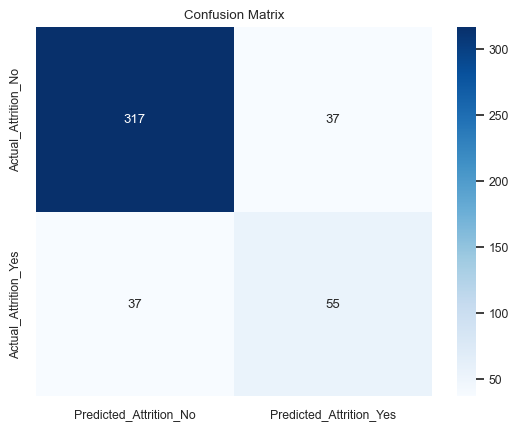

In [774]:
# Confusion Matrix of the best model
svm_cm = final_cm["SVM"]

# heatmap
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Predicted_Attrition_No', 'Predicted_Attrition_Yes'], 
            yticklabels=['Actual_Attrition_No', 'Actual_Attrition_Yes'])
plt.title('Confusion Matrix')
plt.show()

In [775]:
# Confusion matrix of all models
final_cm

{'LGBM': array([[332,  22],
        [ 46,  46]], dtype=int64),
 'logit': array([[332,  22],
        [ 41,  51]], dtype=int64),
 'XGB': array([[336,  18],
        [ 54,  38]], dtype=int64),
 'AdaBoost': array([[312,  42],
        [ 51,  41]], dtype=int64),
 'RF': array([[328,  26],
        [ 60,  32]], dtype=int64),
 'MLP': array([[319,  35],
        [ 35,  57]], dtype=int64),
 'lda': array([[328,  26],
        [ 39,  53]], dtype=int64),
 'SVM': array([[317,  37],
        [ 37,  55]], dtype=int64)}

### 3.1.3.4. Feature Importance 

In [776]:
# Our best model that can give the feature importance or coefficients is the lda model

In [777]:
lda_coef = best_coef["lda"]
lda_coef_df = pd.DataFrame(index=list(X_Sales_final.columns), data=list(lda_coef[0])).sort_values(ascending = False, by =0).reset_index()
lda_coef_df.columns = ["Variable", "Coef_lda"]

logit_coef = best_coef["logit"]
logit_coef_df = pd.DataFrame(index=list(X_Sales_final.columns), data=list(logit_coef[0])).sort_values(ascending = False, by =0).reset_index()
logit_coef_df.columns = ["Variable", "Coef_logit"]

pd.merge(lda_coef_df, logit_coef_df, on="Variable")

Variable  Coef_lda  Coef_logit
0                       OverTime_Yes  2.039528    0.519049
1                        OverTime_No  1.038094    0.001482
2       JobRole_Sales Representative  0.761688    0.333864
3   BusinessTravel_Travel_Frequently  0.584155    0.314680
4            YearsSinceLastPromotion  0.536952    0.263264
5                 NumCompaniesWorked  0.530472    0.208196
6                   DistanceFromHome  0.454986    0.187929
7           EducationField_Marketing  0.328685    0.200508
8                      Gender_Female  0.091243    0.070921
9                  PerformanceRating  0.047237    0.018259
10                         Education -0.030899   -0.038146
11          RelationshipSatisfaction -0.080455   -0.032564
12                YearsInCurrentRole -0.086645   -0.116882
13              YearsWithCurrManager -0.153327   -0.136900
14                               Age -0.190312   -0.143766
15                   WorkLifeBalance -0.242211   -0.101621
16         BusinessTravel_Non-Travel -0.256243   -0.140335
17                 TotalWorkingYears -0.398768   -0.169392
18                   JobSatisfaction -0.448913   -0.222997
19           EnvironmentSatisfaction -0.450176   -0.247352
20                    JobInvolvement -0.540902   -0.305702
21                  StockOptionLevel -0.774561   -0.415502

<Figure size 1000x600 with 0 Axes>

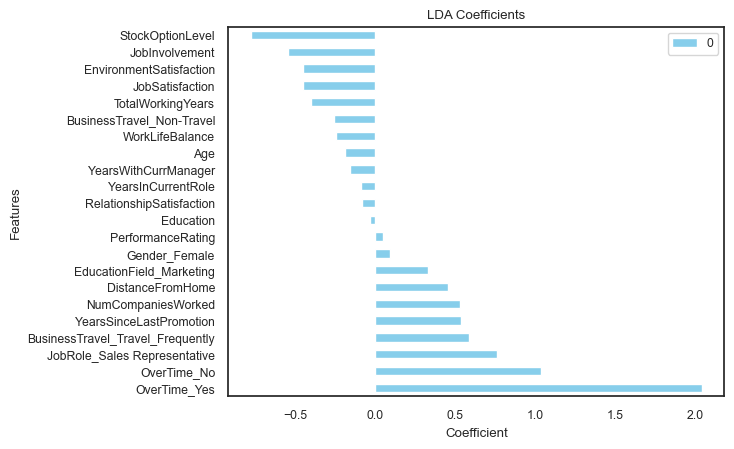

In [778]:
lda_coef_df_viz = pd.DataFrame(index=list(X_Sales_final.columns), data=list(lda_coef[0])).sort_values(ascending = False, by =0)

plt.figure(figsize=(10, 6))
lda_coef_df_viz.plot(kind="barh", color="skyblue")
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.title("LDA Coefficients")
plt.show()

In [779]:
# Top 5 important variables from lda
lda_abs = lda_coef_df["Coef_lda"].abs() # absolute coef
lda_abs_df = pd.DataFrame(data=[lda_coef_df["Variable"], lda_abs]).T.sort_values(by="Coef_lda", ascending=False)
lda_abs_df["Coef_lda"]=lda_abs_df["Coef_lda"].astype("float")
top5_coef_lda = lda_abs_df.nlargest(5, "Coef_lda").reset_index(drop=True)

print(f'Top 5 variables that might have affected to Attrition in Sales Dept. are {list(top5_coef_lda["Variable"])} in order.')
top5_coef_lda

Top 5 variables that might have affected to Attrition in Sales Dept. are ['OverTime_Yes', 'OverTime_No', 'StockOptionLevel', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently'] in order.


Variable  Coef_lda
0                      OverTime_Yes  2.039528
1                       OverTime_No  1.038094
2                  StockOptionLevel  0.774561
3      JobRole_Sales Representative  0.761688
4  BusinessTravel_Travel_Frequently  0.584155

In [780]:
# Top 5 important variables from logit
logit_abs = logit_coef_df["Coef_logit"].abs() # absolute coef
logit_abs_df = pd.DataFrame(data=[logit_coef_df["Variable"], logit_abs]).T.sort_values(by="Coef_logit", ascending=False)
logit_abs_df["Coef_logit"]=logit_abs_df["Coef_logit"].astype("float")
top5_coef_logit = logit_abs_df.nlargest(5, "Coef_logit").reset_index(drop=True)

print(f'Top 5 variables that might have affected to Attrition in Sales Dept. are {list(top5_coef_logit["Variable"])} in order.')
top5_coef_logit

Top 5 variables that might have affected to Attrition in Sales Dept. are ['OverTime_Yes', 'StockOptionLevel', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobInvolvement'] in order.


Variable  Coef_logit
0                      OverTime_Yes    0.519049
1                  StockOptionLevel    0.415502
2      JobRole_Sales Representative    0.333864
3  BusinessTravel_Travel_Frequently    0.314680
4                    JobInvolvement    0.305702